In [5]:
import pandas as pd
import dataframe_image as dfi
import numpy as np
from PIL import Image
from nltk.corpus import wordnet as wn
import nltk
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox



import warnings
warnings.filterwarnings("ignore")


### Concreteness Score dataset

In [6]:
# https://link.springer.com/article/10.3758/s13428-013-0403-5#MOESM1

df2 = pd.read_csv("concreteness.csv")
df2

Word  Bigram  Conc.M  Conc.SD  Unknown  Total  Percent_known  \
0                   a       0    1.46     1.14        2     30       0.933333   
1            aardvark       0    4.68     0.86        0     28       1.000000   
2               aback       0    1.65     1.07        4     27       0.851852   
3              abacus       0    4.52     1.12        2     29       0.931034   
4             abandon       0    2.54     1.45        1     27       0.962963   
...               ...     ...     ...      ...      ...    ...            ...   
39949  zebra crossing       1    4.56     0.75        1     28       0.964286   
39950  zero tolerance       1    2.21     1.45        0     29       1.000000   
39951        ZIP code       1    3.77     1.59        0     30       1.000000   
39952         zoom in       1    3.57     1.40        0     28       1.000000   
39953       zoom lens       1    4.81     0.49        1     27       0.962963   

       SUBTLEX  
0      1041179  
1           21  
2           15  
3           12  
4          413  
...        ...  
39949        0  
39950        0  
39951        0  
39952        0  
39953        0  

[39954 rows x 8 columns]

In [7]:
#functions for stylized plotting

def make_pie(df,column,title,fname):
    df["bucket"] = (df[column].round(1))
    counts = df["bucket"].value_counts().sort_index()
    proportions = counts / counts.sum()

    # styling
    colors = [
        "#F7B7D6",  # soft header pink
        "#FDECF7",  # pale blush
        "#FFE6F2",  # gentle pastel
        "#F7D4E7",  # slightly deeper
        "#EEC2D7",
        "#F4DCEA"
    ]
    # repeat if needed
    if len(proportions) > len(colors):
        repeats = int(np.ceil(len(proportions) / len(colors)))
        colors = (colors * repeats)[:len(proportions)]

    fig, ax = plt.subplots(figsize=(7, 7))

    patches, texts, autotexts = ax.pie(
        proportions,
        labels=proportions.index,
        autopct="%1.1f%%",
        colors=colors,
        startangle=90,
        wedgeprops={"edgecolor": "#E2A8C9", "linewidth": 1.2}
    )
    # label styling
    for t in texts:
        t.set_color("#6A2E5C")
        t.set_fontsize(11)

    for t in autotexts:
        t.set_color("#4A2B3B")
        t.set_fontsize(10)
        t.set_weight("bold")

    ax.set_title(
        "Concreteness Proportions",
        fontsize=18,
        fontweight="bold",
        color="#C84C9A",
        pad=18
    )

    ax.set_ylabel("")

   
    plt.ylabel("")
    plt.rcParams["font.family"] = "DejaVu Sans"

    plt.title(title)
    plt.tight_layout()
    plt.savefig(fname)
    plt.show()

    df = df.drop(columns=["bucket"])

def plot_table(df, title,fname):
    dfsmall = df.head(10)

    # modest friendly font
    plt.rcParams["font.family"] = "DejaVu Sans"

    fig, ax = plt.subplots(figsize=(14, 4))
    ax.axis("off")

    ax.set_title(
        title,
        fontsize=18,
        fontweight="bold",
        color="#C84C9A",   # modest berry-pink
        pad=22
    )

    header_color   = "#F7B7D6"         # soft muted pink
    header_border  = "#E08BB8"         # gentle berry edge
    row_colors     = ["#FFF6FB", "#FDECF7"]  # very light alternating blush
    text_color     = "#6A2E5C"         # restrained plum
    border_color   = "#E2A8C9"         # lighter pastel border

    tbl = ax.table(
        cellText=dfsmall.values,
        colLabels=dfsmall.columns,
        loc="center",
        cellLoc="center"
    )

    tbl.auto_set_font_size(False)
    tbl.set_fontsize(11)
    tbl.scale(1, 1.55)

    # HEADER STYLE (calmer)
    for (row, col), cell in tbl.get_celld().items():
        if row == 0:
            cell.set_facecolor(header_color)
            cell.set_edgecolor(header_border)
            cell.set_linewidth(1.4)
            cell.set_text_props(
                color="#4A2B3B",   # muted chocolate-plum
                weight="bold",
                fontsize=12
            )
        else:
            cell.set_facecolor(row_colors[(row - 1) % 2])
            cell.set_text_props(color=text_color)
            cell.set_edgecolor(border_color)
            cell.set_linewidth(1.0)

    fig.canvas.draw()
    renderer = fig.canvas.get_renderer()

    table_bbox = tbl.get_window_extent(renderer)
    title_bbox = ax.title.get_window_extent(renderer)

    table_bbox_inches = table_bbox.transformed(fig.dpi_scale_trans.inverted())
    title_bbox_inches = title_bbox.transformed(fig.dpi_scale_trans.inverted())

    full_bbox = Bbox.from_extents(
        min(table_bbox_inches.x0, title_bbox_inches.x0),
        min(table_bbox_inches.y0, title_bbox_inches.y0),
        max(table_bbox_inches.x1, title_bbox_inches.x1),
        max(table_bbox_inches.y1, title_bbox_inches.y1),
    )

    fig.savefig(
        fname,
        dpi=300,
        bbox_inches=full_bbox,
        pad_inches=0.06,
    )
    plt.show()
    plt.close(fig)



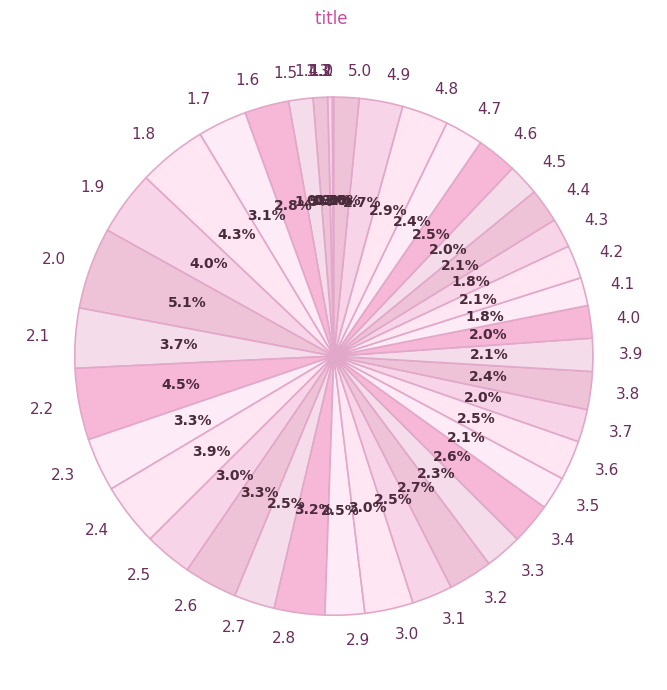

In [8]:
make_pie(df2, "Conc.M", "title ","figures/Conreteness_40K_pie.png")
df2 = df2.drop(columns=["bucket"])

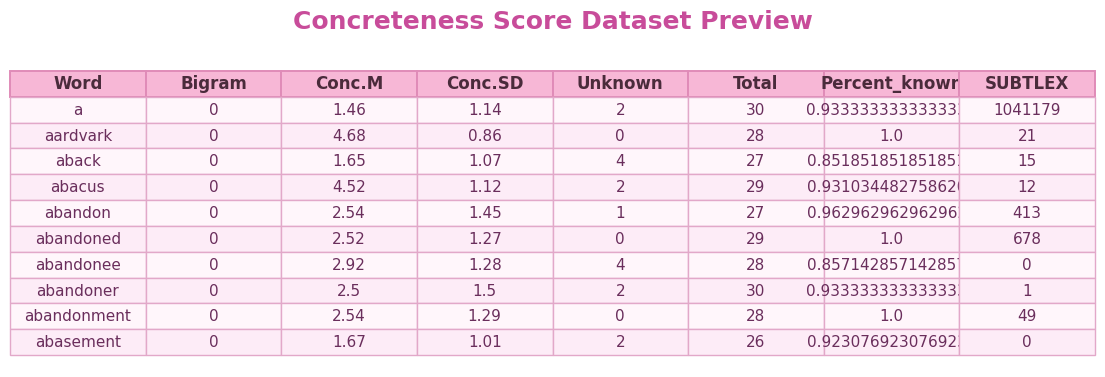

In [9]:
plot_table(df2,"Concreteness Score Dataset Preview" ,"figures/Conreteness_40K_table.png")

In [10]:
# lookup table for concreteness for each word
conc = df2.set_index("Word")["Conc.M"]
conc

Word
a                 1.46
aardvark          4.68
aback             1.65
abacus            4.52
abandon           2.54
                  ... 
zebra crossing    4.56
zero tolerance    2.21
ZIP code          3.77
zoom in           3.57
zoom lens         4.81
Name: Conc.M, Length: 39954, dtype: float64

### WordNet: Synset_id and corresponding words dataset

In [11]:
df_synsets = pd.read_pickle("synsets.pkl")
df_synsets

synset_id                                             words
0      n00001740                                          [entity]
1      n00001930                                 [physical entity]
2      n00002137                    [abstraction, abstract entity]
3      n00002452                                           [thing]
4      n00002684                         [object, physical object]
...          ...                                               ...
82110  n15299225                                      [study hall]
82111  n15299367  [Transfiguration, Transfiguration Day, August 6]
82112  n15299585                                          [usance]
82113  n15299783                                          [window]
82114  n15300051      [9/11, 9-11, September 11, Sept. 11, Sep 11]

[82115 rows x 2 columns]

In [12]:
def synset_name(sid):
    pos = sid[0]          # "n"
    offset = int(sid[1:]) # e.g., 15299783
    s = wn.synset_from_pos_and_offset(pos, offset)
    return s.name()       # e.g., "canine.n.02"

def clean_synset_name(name):
    lemma = name.split(".")[0]          # "study_hall.n.01"
    return lemma.replace("_", " ")      # "study hall"

df_synsets["synset_name"] = df_synsets["synset_id"].apply(synset_name)
df_synsets["synset_name"] = df_synsets["synset_name"].apply(clean_synset_name)

df_synsets

synset_id                                             words  \
0      n00001740                                          [entity]   
1      n00001930                                 [physical entity]   
2      n00002137                    [abstraction, abstract entity]   
3      n00002452                                           [thing]   
4      n00002684                         [object, physical object]   
...          ...                                               ...   
82110  n15299225                                      [study hall]   
82111  n15299367  [Transfiguration, Transfiguration Day, August 6]   
82112  n15299585                                          [usance]   
82113  n15299783                                          [window]   
82114  n15300051      [9/11, 9-11, September 11, Sept. 11, Sep 11]   

           synset_name  
0               entity  
1      physical entity  
2          abstraction  
3                thing  
4               object  
...                ...  
82110       study hall  
82111  transfiguration  
82112           usance  
82113           window  
82114             9/11  

[82115 rows x 3 columns]

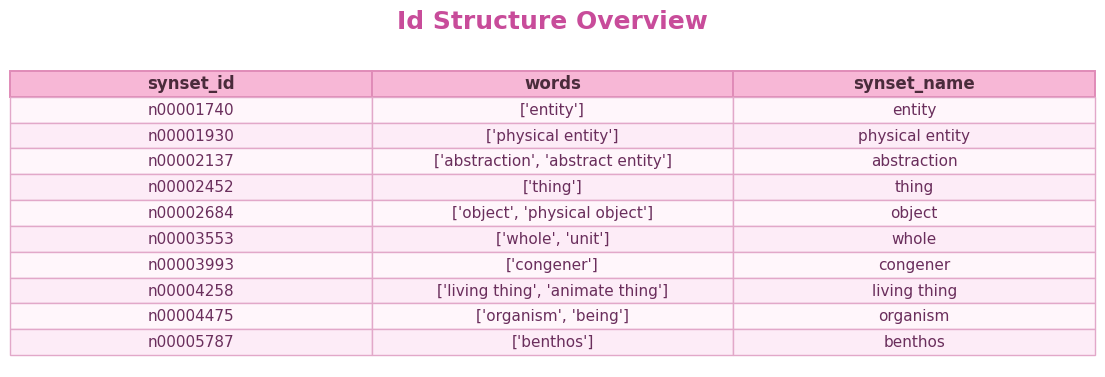

In [13]:
plot_table(df_synsets, "Id Structure Overview", "figures/Synset_id_words_name.png")

### Functions for traversing Synset Tree 

In [14]:
def nearest_valid_ancestor(score_col, synset_id, thresh):
    pos = 'n'
    offset = int(synset_id[1:]) # e.g. 00001930
    try:
        s = wn.synset_from_pos_and_offset(pos, offset)
    except:
        return None

    for path in s.hypernym_paths():
        for anc in reversed(path):
            anc_id = f"{pos}{anc.offset():08d}"
            score = score_col.get(anc_id, None)
            if score is not None and score >= thresh:
                return anc_id
    return None

def trace_hypernym_traversal(score_col, synset_id, thresh):
    pos = 'n'
    offset = int(synset_id[1:]) # e.g. 00001930
    try:
        s = wn.synset_from_pos_and_offset(pos, offset)
    except:
        return "invalid synset id"

    traces = []

    for path in s.hypernym_paths():
        collected = []
        for anc in reversed(path):
            collected.append(anc.name())   # store readable name
            anc_id = f"{pos}{anc.offset():08d}"
            score = score_col.get(anc_id, None)
            if score is not None and score >= thresh:
                traces.append(" → ".join(collected))
                break

        if traces:
            return traces[0]

    return collected + ["NO_THRESHOLD_MET"]


### Assigning synset_ids concreteness scores by id name Approach 1:

Use score of synset id name

In [15]:
# returns the score of word with the largest value
def max_conc(words):
    vals = conc.reindex(np.array([words]))
    return vals.max()

# returns the word with the largest value
def most_concrete(words):
    vals = conc.reindex(np.array([words]))       
    return vals.idxmax()   

# apply concreteness score to every synset id in wordnet (82k)
df_synsets["concreteness"] = df_synsets["synset_name"].apply(max_conc).fillna(0)
df_synsets

synset_id                                             words  \
0      n00001740                                          [entity]   
1      n00001930                                 [physical entity]   
2      n00002137                    [abstraction, abstract entity]   
3      n00002452                                           [thing]   
4      n00002684                         [object, physical object]   
...          ...                                               ...   
82110  n15299225                                      [study hall]   
82111  n15299367  [Transfiguration, Transfiguration Day, August 6]   
82112  n15299585                                          [usance]   
82113  n15299783                                          [window]   
82114  n15300051      [9/11, 9-11, September 11, Sept. 11, Sep 11]   

           synset_name  concreteness  
0               entity          2.68  
1      physical entity          0.00  
2          abstraction          1.57  
3                thing          3.17  
4               object          3.66  
...                ...           ...  
82110       study hall          0.00  
82111  transfiguration          2.35  
82112           usance          0.00  
82113           window          4.86  
82114             9/11          0.00  

[82115 rows x 4 columns]

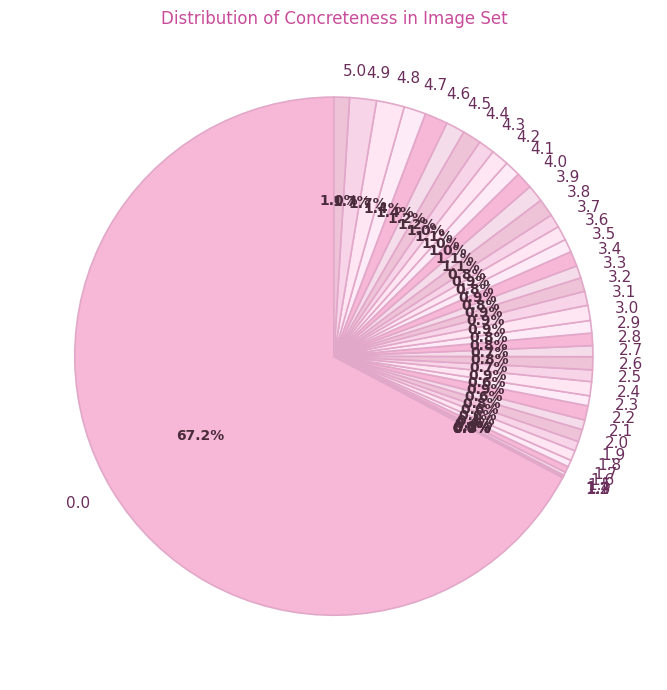

In [16]:
make_pie(df_synsets,"concreteness", "Distribution of Concreteness in Image Set", "figures/Conreteness_synset_name_pie.png")
df_synsets = df_synsets.drop(columns=["bucket"])

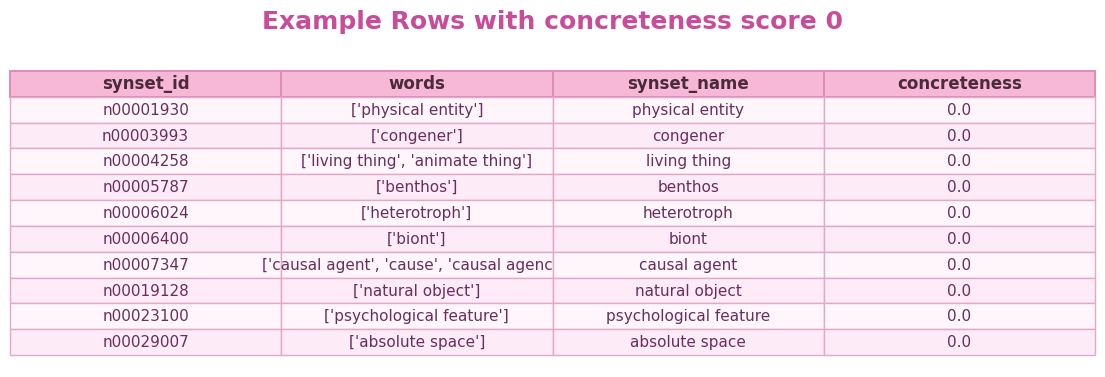

In [17]:
df_synsets_subset = df_synsets[df_synsets["concreteness"] == 0]
plot_table(df_synsets_subset, "Example Rows with concreteness score 0", "figures/Synset_id_words_name_0.png")

In [18]:
# look up for scores for synset ids
# this contains a score for each id
synset_scores = df_synsets.set_index("synset_id")["concreteness"]
synset_scores

synset_id
n00001740    2.68
n00001930    0.00
n00002137    1.57
n00002452    3.17
n00002684    3.66
             ... 
n15299225    0.00
n15299367    2.35
n15299585    0.00
n15299783    4.86
n15300051    0.00
Name: concreteness, Length: 82115, dtype: float64

### Applying scores to the 1000 labels of the images

In [19]:
df1 = pd.read_csv("synsetid_words.csv") #1k synset ids needed for imageset
score_dict = dict(synset_scores)
df1["score"] = df1["synset_id"].map(score_dict)
df1

synset_id                                        description  score
0    n01440764                                 tench, Tinca tinca   0.00
1    n01443537                        goldfish, Carassius auratus   4.79
2    n01484850  great white shark, white shark, man-eater, man...   0.00
3    n01491361                    tiger shark, Galeocerdo cuvieri   0.00
4    n01494475                       hammerhead, hammerhead shark   4.28
..         ...                                                ...    ...
995  n13044778                                          earthstar   0.00
996  n13052670  hen-of-the-woods, hen of the woods, Polyporus ...   0.00
997  n13054560                                             bolete   0.00
998  n13133613                              ear, spike, capitulum   5.00
999  n15075141       toilet tissue, toilet paper, bathroom tissue   4.86

[1000 rows x 3 columns]

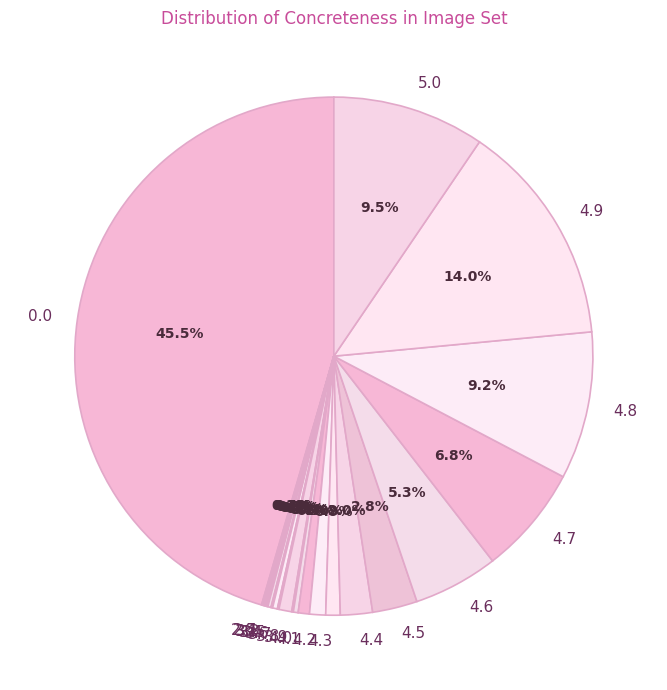

In [20]:
make_pie(df1,"score", "Distribution of Concreteness in Image Set", "figures/Conreteness_synset_name_pie.png")
df1 = df1.drop(columns=["bucket"])

### Applying Scores to the 50000 images


In [21]:
img_df = pd.read_csv("LOC_val_solution.csv") # contains image id and bounding box with id
img_df["synset"] = img_df["PredictionString"].astype(str).str[:9] # take first id
img_df

ImageId  \
0      ILSVRC2012_val_00048981   
1      ILSVRC2012_val_00037956   
2      ILSVRC2012_val_00026161   
3      ILSVRC2012_val_00026171   
4      ILSVRC2012_val_00008726   
...                        ...   
49995  ILSVRC2012_val_00005961   
49996  ILSVRC2012_val_00008801   
49997  ILSVRC2012_val_00008176   
49998  ILSVRC2012_val_00004764   
49999  ILSVRC2012_val_00031847   

                                        PredictionString     synset  
0                                n03995372 85 1 499 272   n03995372  
1                               n03481172 131 0 499 254   n03481172  
2                                n02108000 38 0 464 280   n02108000  
3                                n03109150 0 14 216 299   n03109150  
4      n02119789 255 142 454 329 n02119789 44 21 322 ...  n02119789  
...                                                  ...        ...  
49995                           n03388043 103 0 279 472   n03388043  
49996  n03089624 101 286 170 374 n03089624 236 282 30...  n03089624  
49997                           n01518878 82 98 439 498   n01518878  
49998                          n03874293 91 111 490 420   n03874293  
49999                           n01855032 48 92 415 227   n01855032  

[50000 rows x 3 columns]

In [22]:
# https://www.kaggle.com/competitions/imagenet-object-localization-challenge/data?select=LOC_synset_mapping.txt

img_df = pd.read_csv("LOC_val_solution.csv") # contains image id and bounding box with id
img_df["synset_id"] = img_df["PredictionString"].astype(str).str[:9] # take first id
score_dict = dict(synset_scores)
img_df["score"] = img_df["synset_id"].map(score_dict)
img_df

ImageId  \
0      ILSVRC2012_val_00048981   
1      ILSVRC2012_val_00037956   
2      ILSVRC2012_val_00026161   
3      ILSVRC2012_val_00026171   
4      ILSVRC2012_val_00008726   
...                        ...   
49995  ILSVRC2012_val_00005961   
49996  ILSVRC2012_val_00008801   
49997  ILSVRC2012_val_00008176   
49998  ILSVRC2012_val_00004764   
49999  ILSVRC2012_val_00031847   

                                        PredictionString  synset_id  score  
0                                n03995372 85 1 499 272   n03995372   0.00  
1                               n03481172 131 0 499 254   n03481172   4.77  
2                                n02108000 38 0 464 280   n02108000   0.00  
3                                n03109150 0 14 216 299   n03109150   4.85  
4      n02119789 255 142 454 329 n02119789 44 21 322 ...  n02119789   0.00  
...                                                  ...        ...    ...  
49995                           n03388043 103 0 279 472   n03388043   4.77  
49996  n03089624 101 286 170 374 n03089624 236 282 30...  n03089624   3.75  
49997                           n01518878 82 98 439 498   n01518878   4.71  
49998                          n03874293 91 111 490 420   n03874293   0.00  
49999                           n01855032 48 92 415 227   n01855032   0.00  

[50000 rows x 4 columns]

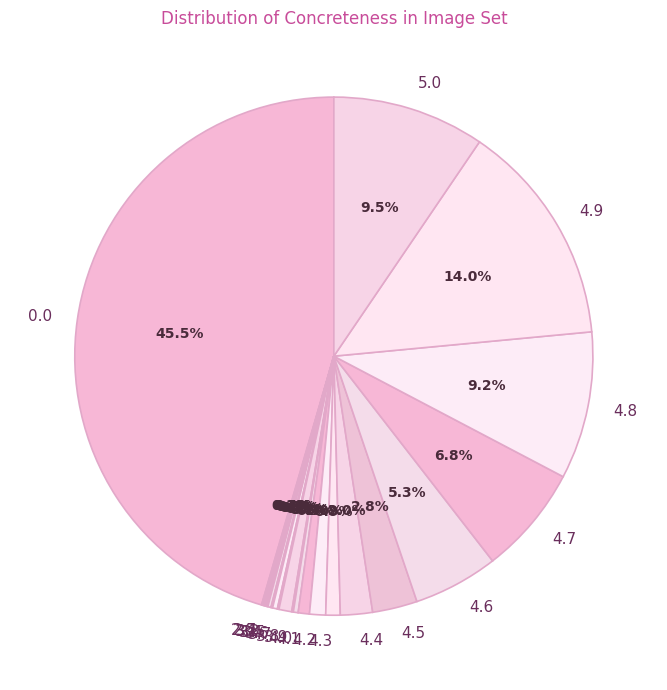

In [23]:
make_pie(img_df,"score", "Distribution of Concreteness in Image Set", "figures/Conreteness_synset_name_pie.png")
img_df = img_df.drop(columns=["bucket"])

In [24]:
# add synset names for display

img_df["synset_name"] = img_df["synset_id"].apply(synset_name) # has .n.
#img_df["synset_name"] = img_df["synset_name"].apply(clean_synset_name)

Instead of "entlebuchner" we want to find a better label like "dog".

In [25]:
def show_image_with_metadata(
    df,
    synset_id,
    img_dir="val",
    figsize=(6, 7),
):
    row = df.loc[df["synset_id"] == synset_id].iloc[0]

    img_path = f"{img_dir}/{row['ImageId']}.JPEG"
    img = Image.open(img_path)

    fig, ax = plt.subplots(figsize=figsize)

    ax.imshow(img)
    ax.axis("off")

    # caption text (left-aligned, compact)
    caption = (
        f"synset_id: {row['synset_id']}\n"
        f"score: {row['score']}\n"
        f"name: {row['synset_name']}"
    )

    ax.text(
        0.0, -0.02,              # push below image
        caption,
        transform=ax.transAxes,
        ha="left",
        va="top",
        fontsize=14,
        color="#4A2B3B",
        family="DejaVu Sans"
    )

    fig.patch.set_facecolor("#FFF5FA")
    ax.set_facecolor("#FDECF7")

    plt.tight_layout()
    plt.show()

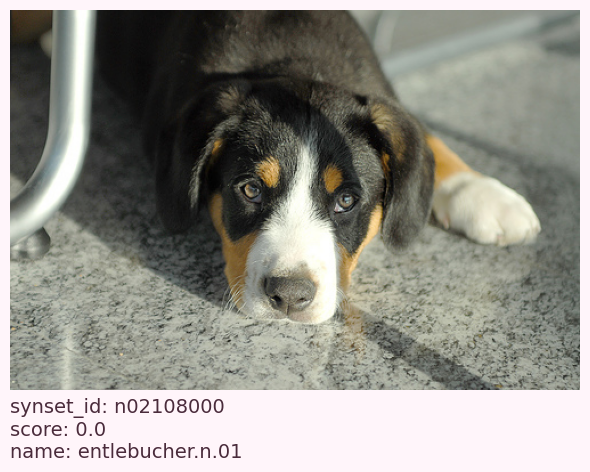

In [26]:
show_image_with_metadata(img_df, "n02108000", "val")

### Find mapping for 1000 labels

In [27]:
df1 = pd.read_csv("synsetid_words.csv") #1k synset ids needed for imageset
score_dict = dict(synset_scores)
df1["score"] = df1["synset_id"].map(score_dict) # use score dictionary from before to initialize scores

df1["synset_name"] = df1["synset_id"].apply(synset_name) # has .n.
#img_df["synset_name"] = img_df["synset_name"].apply(clean_synset_name)
df1 = df1.drop(columns=["description"])

df1

synset_id  score             synset_name
0    n01440764   0.00              tench.n.01
1    n01443537   4.79           goldfish.n.01
2    n01484850   0.00  great_white_shark.n.01
3    n01491361   0.00        tiger_shark.n.01
4    n01494475   4.28         hammerhead.n.03
..         ...    ...                     ...
995  n13044778   0.00          earthstar.n.01
996  n13052670   0.00   hen-of-the-woods.n.01
997  n13054560   0.00             bolete.n.01
998  n13133613   5.00                ear.n.05
999  n15075141   4.86      toilet_tissue.n.01

[1000 rows x 3 columns]

### Simple Threshold traversal up

In [28]:
df1 = pd.read_csv("synsetid_words.csv") #1k synset ids needed for imageset
score_dict = dict(synset_scores)
df1["score"] = df1["synset_id"].map(score_dict) # use score dictionary from before to initialize scores

df1["synset_name"] = df1["synset_id"].apply(synset_name) # has .n.
#img_df["synset_name"] = img_df["synset_name"].apply(clean_synset_name)
df1 = df1.drop(columns=["description"])

def nearest_valid_ancestor(score_col, synset_id, thresh):
    pos = 'n'
    offset = int(synset_id[1:])
    try:
        s = wn.synset_from_pos_and_offset(pos, offset)
    except:
        return None

    for path in s.hypernym_paths():
        for anc in reversed(path):
            anc_id = f"{pos}{anc.offset():08d}"
            score = score_col.get(anc_id, None)
            if score is not None and score >= thresh:
                return anc_id
    return None

def trace_hypernym_traversal(score_col, synset_id, thresh):
    pos = 'n'
    offset = int(synset_id[1:])
    try:
        s = wn.synset_from_pos_and_offset(pos, offset)
    except:
        return "invalid synset id"

    traces = []

    for path in s.hypernym_paths():
        collected = []
        for anc in reversed(path):
            collected.append(anc.name())   # store readable name
            anc_id = f"{pos}{anc.offset():08d}"
            score = score_col.get(anc_id, None)
            if score is not None and score >= thresh:
                traces.append(" → ".join(collected))
                break

        if traces:
            return traces[0]

    return collected + ["NO_THRESHOLD_MET"]


def assign_new_synsetid(df, thresh):

    df["mapped_synset_list"] = df.apply(
        lambda row:
            row["synset_id"] if row["score"] >= thresh
            else trace_hypernym_traversal(synset_scores,row["synset_id"], thresh),
        axis=1)
    df["mapped_synset_id"] = df.apply(
        lambda row:
            row["synset_id"] if row["score"] >= thresh
            else nearest_valid_ancestor(synset_scores,row["synset_id"], thresh),
        axis=1)
    df["mapped_score"] = df["mapped_synset_id"].map(synset_scores)
    # Create a lookup from synset_id → words list
    synset_words_lookup = df_synsets.set_index("synset_id")["words"]
    # Add a column in df1 for the mapped word list
    df["mapped_word_list"] = df["mapped_synset_id"].map(synset_words_lookup)
    return df

assign_new_synsetid(df1, 4.7)
df1

synset_id  score             synset_name  \
0    n01440764   0.00              tench.n.01   
1    n01443537   4.79           goldfish.n.01   
2    n01484850   0.00  great_white_shark.n.01   
3    n01491361   0.00        tiger_shark.n.01   
4    n01494475   4.28         hammerhead.n.03   
..         ...    ...                     ...   
995  n13044778   0.00          earthstar.n.01   
996  n13052670   0.00   hen-of-the-woods.n.01   
997  n13054560   0.00             bolete.n.01   
998  n13133613   5.00                ear.n.05   
999  n15075141   4.86      toilet_tissue.n.01   

                                    mapped_synset_list mapped_synset_id  \
0    tench.n.01 → cyprinid.n.01 → cypriniform_fish....        n02512053   
1                                            n01443537        n01443537   
2    great_white_shark.n.01 → mackerel_shark.n.01 →...        n01482330   
3    tiger_shark.n.01 → requiem_shark.n.01 → shark....        n01482330   
4                         hammerhead.n.03 → shark.n.01        n01482330   
..                                                 ...              ...   
995  [earthstar.n.01, fungus.n.01, organism.n.01, l...             None   
996  [hen-of-the-woods.n.01, fungus.n.01, organism....             None   
997  [bolete.n.01, fungus.n.01, organism.n.01, livi...             None   
998                                          n13133613        n13133613   
999                                          n15075141        n15075141   

     mapped_score                                mapped_word_list  
0            5.00                                          [fish]  
1            4.79                   [goldfish, Carassius auratus]  
2            4.93                                         [shark]  
3            4.93                                         [shark]  
4            4.93                                         [shark]  
..            ...                                             ...  
995           NaN                                             NaN  
996           NaN                                             NaN  
997           NaN                                             NaN  
998          5.00                         [ear, spike, capitulum]  
999          4.86  [toilet tissue, toilet paper, bathroom tissue]  

[1000 rows x 7 columns]

In [29]:
df1 = pd.read_csv("synsetid_words.csv")  # 1k synset ids needed for imageset
score_dict = dict(synset_scores)

df1["score"] = df1["synset_id"].map(score_dict)
df1["synset_name"] = df1["synset_id"].apply(synset_name)
df1 = df1.drop(columns=["description"])


def linear_upward_with_fallback(score_col, synset_id, thresh_primary, thresh_secondary):
    pos = 'n'
    offset = int(synset_id[1:])
    try:
        current = wn.synset_from_pos_and_offset(pos, offset)
    except:
        return None

    best_id = None
    best_score = float("-inf")

    while True:
        cur_id = f"{pos}{current.offset():08d}"
        score = score_col.get(cur_id)

        if score is not None:
            # primary: first valid ancestor going upward
            if score >= thresh_primary:
                return cur_id

            # fallback tracking (same chain only)
            if score > best_score:
                best_score = score
                best_id = cur_id

        parents = current.hypernyms()
        if not parents:
            break

        current = parents[0]  # single-chain ascent only

    if best_id is not None and best_score >= thresh_secondary:
        return best_id

    return None


def trace_linear_traversal(score_col, synset_id, thresh_primary):
    pos = 'n'
    offset = int(synset_id[1:])
    try:
        current = wn.synset_from_pos_and_offset(pos, offset)
    except:
        return "invalid synset id"

    trace = []

    while True:
        trace.append(current.name())
        cur_id = f"{pos}{current.offset():08d}"
        score = score_col.get(cur_id)

        if score is not None and score >= thresh_primary:
            return " → ".join(trace)

        parents = current.hypernyms()
        if not parents:
            break

        current = parents[0]

    return " → ".join(trace) + " → NO_THRESHOLD_MET"


def assign_new_synsetid(df, thresh_primary, thresh_secondary):

    df["mapped_synset_list"] = df.apply(
        lambda row:
            row["synset_id"]
            if row["score"] >= thresh_primary
            else trace_linear_traversal(
                synset_scores, row["synset_id"], thresh_primary
            ),
        axis=1
    )

    df["mapped_synset_id"] = df.apply(
        lambda row:
            row["synset_id"]
            if row["score"] >= thresh_primary
            else linear_upward_with_fallback(
                synset_scores,
                row["synset_id"],
                thresh_primary,
                thresh_secondary
            ),
        axis=1
    )

    df["mapped_score"] = df["mapped_synset_id"].map(synset_scores)

    synset_words_lookup = df_synsets.set_index("synset_id")["words"]
    df["mapped_word_list"] = df["mapped_synset_id"].map(synset_words_lookup)

    return df


assign_new_synsetid(df1, thresh_primary=4.7, thresh_secondary=3.5)
df1


synset_id  score             synset_name  \
0    n01440764   0.00              tench.n.01   
1    n01443537   4.79           goldfish.n.01   
2    n01484850   0.00  great_white_shark.n.01   
3    n01491361   0.00        tiger_shark.n.01   
4    n01494475   4.28         hammerhead.n.03   
..         ...    ...                     ...   
995  n13044778   0.00          earthstar.n.01   
996  n13052670   0.00   hen-of-the-woods.n.01   
997  n13054560   0.00             bolete.n.01   
998  n13133613   5.00                ear.n.05   
999  n15075141   4.86      toilet_tissue.n.01   

                                    mapped_synset_list mapped_synset_id  \
0    tench.n.01 → cyprinid.n.01 → cypriniform_fish....        n02512053   
1                                            n01443537        n01443537   
2    great_white_shark.n.01 → mackerel_shark.n.01 →...        n01482330   
3    tiger_shark.n.01 → requiem_shark.n.01 → shark....        n01482330   
4                         hammerhead.n.03 → shark.n.01        n01482330   
..                                                 ...              ...   
995  earthstar.n.01 → fungus.n.01 → organism.n.01 →...        n12992868   
996  hen-of-the-woods.n.01 → fungus.n.01 → organism...        n12992868   
997  bolete.n.01 → fungus.n.01 → organism.n.01 → li...        n12992868   
998                                          n13133613        n13133613   
999                                          n15075141        n15075141   

     mapped_score                                mapped_word_list  
0            5.00                                          [fish]  
1            4.79                   [goldfish, Carassius auratus]  
2            4.93                                         [shark]  
3            4.93                                         [shark]  
4            4.93                                         [shark]  
..            ...                                             ...  
995          4.59                                        [fungus]  
996          4.59                                        [fungus]  
997          4.59                                        [fungus]  
998          5.00                         [ear, spike, capitulum]  
999          4.86  [toilet tissue, toilet paper, bathroom tissue]  

[1000 rows x 7 columns]

Count how many labels are now there.

In [30]:
# does mapping with given threshold
def run_mapping(df, threshold):
    d = df.copy()
    d["score"] = d["synset_id"].map(score_dict).fillna(0)

    d["mapped_synset_list"] = d.apply(
        lambda row:
            row["synset_id"] if row["score"] >= threshold
            else trace_hypernym_traversal(synset_scores, row["synset_id"], threshold),
        axis=1,
    )
    d["mapped_synset"] = d.apply(
        lambda row:
            row["synset_id"] if row["score"] >= threshold
            else nearest_valid_ancestor(synset_scores, row["synset_id"], threshold),
        axis=1,
    )

    d["mapped_score"] = d["mapped_synset"].map(score_dict).fillna(0)
    return d

# does multiple mappings with list of thresholds
def test_thresholds(df, thresholds):
    results = {}

    for t in thresholds:
        mapped = run_mapping(df, t)
        # number of *unique* mapped labels remaining
        n_labels = mapped["mapped_synset"].nunique()
        results[t] = n_labels

    x = list(results.keys())
    y = list(results.values())

    return x,y

# stylized plot of x thresholds by y number of labels
def plot_number_labels_threshold(x,y):
    fig, ax = plt.subplots(figsize=(9, 6))

    bars = ax.bar([str(v) for v in x],y,color="#F7B7D6",edgecolor="#C84C9A",linewidth=1.2)

    ax.set_facecolor("#FDECF7")
    fig.patch.set_facecolor("#FFF5FA")

    ax.grid( axis="y", linestyle="--", linewidth=0.6, color="#EEC2D7", alpha=0.8)
    ax.set_xlabel("Threshold score (0 = no threshold)", fontsize=12,color="#6A2E5C")
    ax.set_ylabel("Remaining label count", fontsize=12, color="#6A2E5C")
    ax.set_title("Effect of threshold on number of labels",fontsize=18,fontweight="bold",color="#C84C9A",pad=14)
    ax.tick_params(axis="x", labelrotation=45, labelcolor="#4A2B3B")
    ax.tick_params(axis="y", labelcolor="#4A2B3B")

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2,height,f"{height}",ha="center",va="bottom",fontsize=10,color="#4A2B3B")

    plt.tight_layout()
    plt.show()

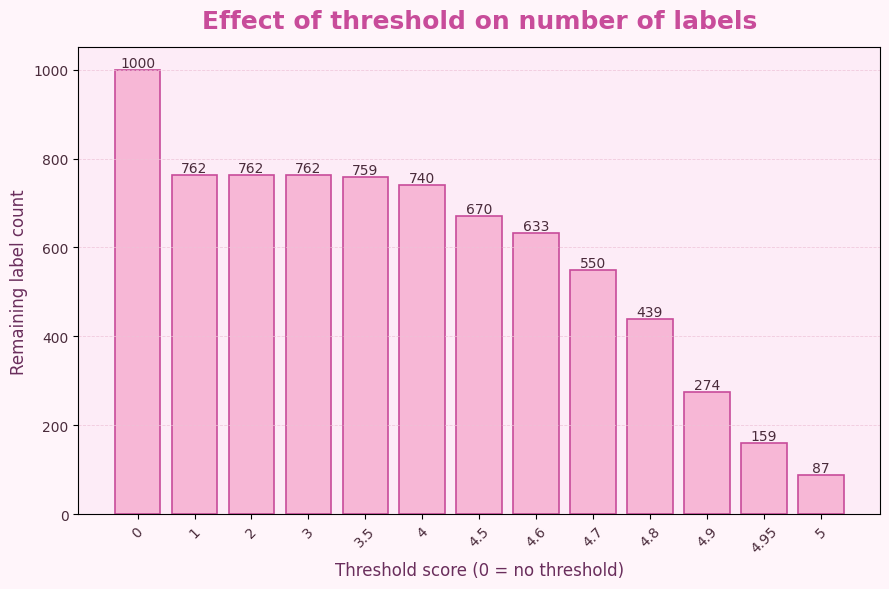

In [31]:
score_dict = dict(synset_scores)
thresholds = [0,1,2,3,3.5,4,4.5 ,4.6,4.7,4.8,4.9,4.95,5]
x,y = test_thresholds(df1, thresholds)
plot_number_labels_threshold(x,y)

### Simple Threshold traversal up with Fallback

In [32]:
df1 = pd.read_csv("synsetid_words.csv")  # 1k synset ids needed for imageset
score_dict = dict(synset_scores)

df1["score"] = df1["synset_id"].map(score_dict)
df1["synset_name"] = df1["synset_id"].apply(synset_name)
df1 = df1.drop(columns=["description"])


def linear_upward_with_fallback(score_col, synset_id, thresh_primary, thresh_secondary):
    pos = 'n'
    offset = int(synset_id[1:])
    try:
        current = wn.synset_from_pos_and_offset(pos, offset)
    except:
        return None

    best_id = None
    best_score = float("-inf")

    while True:
        cur_id = f"{pos}{current.offset():08d}"
        score = score_col.get(cur_id)

        if score is not None:
            # primary: first valid ancestor going upward
            if score >= thresh_primary:
                return cur_id

            # fallback tracking (same chain only)
            if score > best_score:
                best_score = score
                best_id = cur_id

        parents = current.hypernyms()
        if not parents:
            break

        current = parents[0]  # single-chain ascent only

    if best_id is not None and best_score >= thresh_secondary:
        return best_id

    return None


def trace_linear_traversal(score_col, synset_id, thresh_primary):
    pos = 'n'
    offset = int(synset_id[1:])
    try:
        current = wn.synset_from_pos_and_offset(pos, offset)
    except:
        return "invalid synset id"

    trace = []

    while True:
        trace.append(current.name())
        cur_id = f"{pos}{current.offset():08d}"
        score = score_col.get(cur_id)

        if score is not None and score >= thresh_primary:
            return " → ".join(trace)

        parents = current.hypernyms()
        if not parents:
            break

        current = parents[0]

    return " → ".join(trace) + " → NO_THRESHOLD_MET"


def assign_new_synsetid(df, thresh_primary, thresh_secondary):

    df["mapped_synset_list"] = df.apply(
        lambda row:
            row["synset_id"]
            if row["score"] >= thresh_primary
            else trace_linear_traversal(
                synset_scores, row["synset_id"], thresh_primary
            ),
        axis=1
    )

    df["mapped_synset_id"] = df.apply(
        lambda row:
            row["synset_id"]
            if row["score"] >= thresh_primary
            else linear_upward_with_fallback(
                synset_scores,
                row["synset_id"],
                thresh_primary,
                thresh_secondary
            ),
        axis=1
    )

    df["mapped_score"] = df["mapped_synset_id"].map(synset_scores)

    synset_words_lookup = df_synsets.set_index("synset_id")["words"]
    df["mapped_word_list"] = df["mapped_synset_id"].map(synset_words_lookup)

    return df


assign_new_synsetid(df1, thresh_primary=4.7, thresh_secondary=4.5)
df1


synset_id  score             synset_name  \
0    n01440764   0.00              tench.n.01   
1    n01443537   4.79           goldfish.n.01   
2    n01484850   0.00  great_white_shark.n.01   
3    n01491361   0.00        tiger_shark.n.01   
4    n01494475   4.28         hammerhead.n.03   
..         ...    ...                     ...   
995  n13044778   0.00          earthstar.n.01   
996  n13052670   0.00   hen-of-the-woods.n.01   
997  n13054560   0.00             bolete.n.01   
998  n13133613   5.00                ear.n.05   
999  n15075141   4.86      toilet_tissue.n.01   

                                    mapped_synset_list mapped_synset_id  \
0    tench.n.01 → cyprinid.n.01 → cypriniform_fish....        n02512053   
1                                            n01443537        n01443537   
2    great_white_shark.n.01 → mackerel_shark.n.01 →...        n01482330   
3    tiger_shark.n.01 → requiem_shark.n.01 → shark....        n01482330   
4                         hammerhead.n.03 → shark.n.01        n01482330   
..                                                 ...              ...   
995  earthstar.n.01 → fungus.n.01 → organism.n.01 →...        n12992868   
996  hen-of-the-woods.n.01 → fungus.n.01 → organism...        n12992868   
997  bolete.n.01 → fungus.n.01 → organism.n.01 → li...        n12992868   
998                                          n13133613        n13133613   
999                                          n15075141        n15075141   

     mapped_score                                mapped_word_list  
0            5.00                                          [fish]  
1            4.79                   [goldfish, Carassius auratus]  
2            4.93                                         [shark]  
3            4.93                                         [shark]  
4            4.93                                         [shark]  
..            ...                                             ...  
995          4.59                                        [fungus]  
996          4.59                                        [fungus]  
997          4.59                                        [fungus]  
998          5.00                         [ear, spike, capitulum]  
999          4.86  [toilet tissue, toilet paper, bathroom tissue]  

[1000 rows x 7 columns]

In [33]:

def run_mapping_fallback1(df, t_primary, t_secondary):
    d = df.copy()

    d["mapped_synset_list"] = np.where(
        d["score"] >= t_primary,
        d["synset_id"],
        d["synset_id"].apply(
            lambda sid: trace_linear_traversal(
                synset_scores, sid, t_primary
            )
        ),
    )

    d["mapped_synset"] = np.where(
        d["score"] >= t_primary,
        d["synset_id"],
        d["synset_id"].apply(
            lambda sid: linear_upward_with_fallback(
                synset_scores, sid, t_primary, t_secondary
            )
        ),
    )

    d["mapped_score"] = d["mapped_synset"].map(synset_scores)
    return d


# test multiple primary thresholds (secondary fixed or derived)
def test_thresholds_fallback1(df, thresholds, t_secondary):
    results = {
        t: run_mapping_fallback1(df, t, t_secondary)["mapped_synset"].nunique()
        for t in thresholds
    }
    return list(results.keys()), list(results.values())


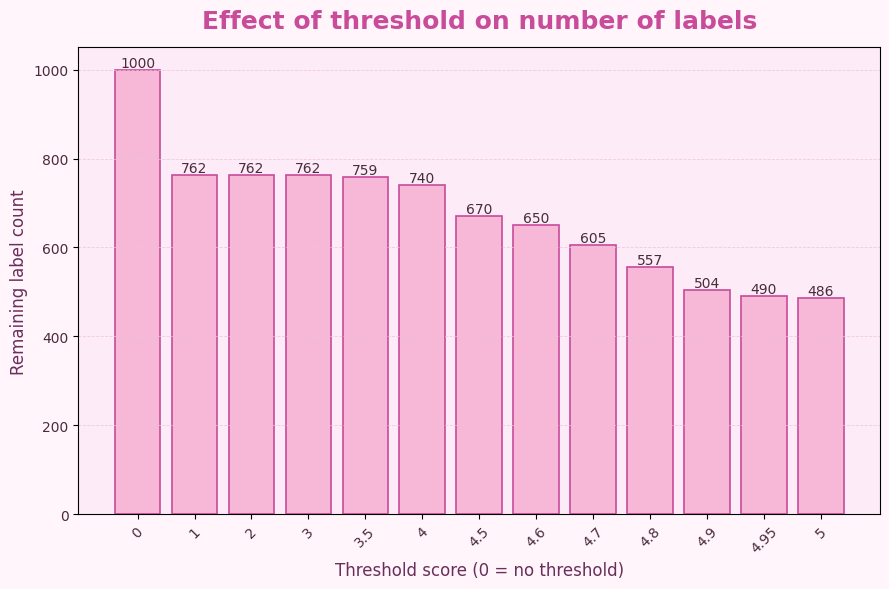

In [34]:
score_dict = dict(synset_scores)
thresholds = [0,1,2,3,3.5,4,4.5 ,4.6,4.7,4.8,4.9,4.95,5]

x,y = test_thresholds_fallback1(df1, thresholds, 4.0)
plot_number_labels_threshold(x,y)

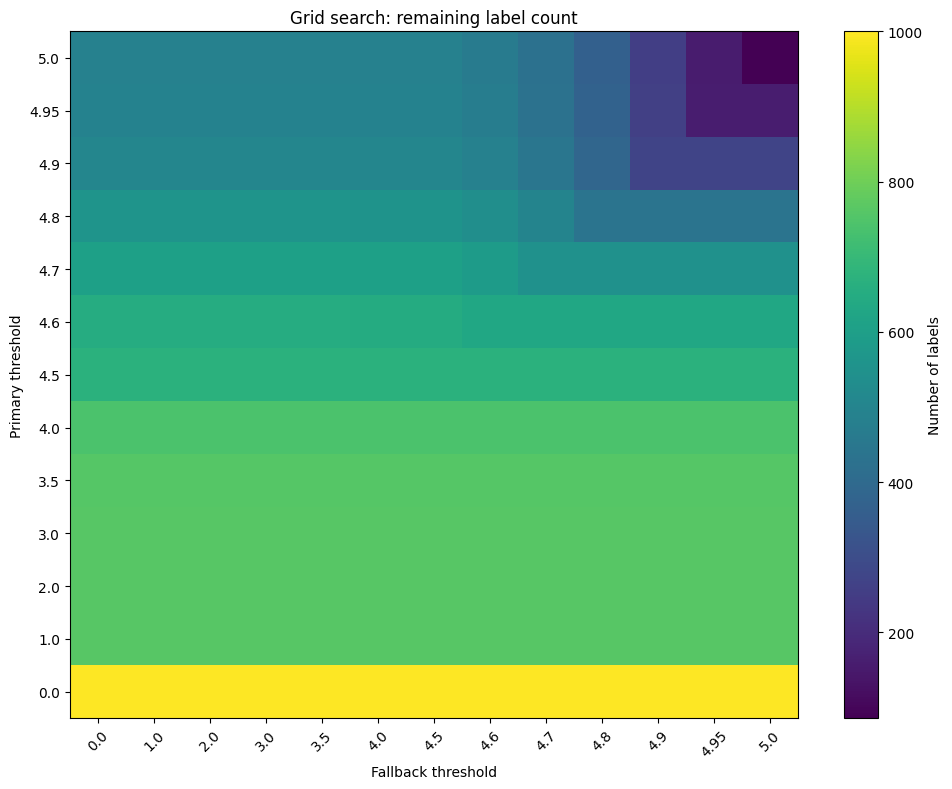

In [35]:
# plot but with multiple fallback thresholds 

def run_mapping(df, t_primary, t_secondary):
    d = df.copy()

    d["mapped_synset"] = np.where(
        d["score"] >= t_primary,
        d["synset_id"],
        d["synset_id"].apply(
            lambda sid: linear_upward_with_fallback(
                synset_scores, sid, t_primary, t_secondary
            )
        ),
    )

    return d

def test_thresholds_fallback(df, primary_thresholds, fallback_thresholds):
    Z = np.zeros((len(primary_thresholds), len(fallback_thresholds)))

    for i, tp in enumerate(primary_thresholds):
        for j, ts in enumerate(fallback_thresholds):
            mapped = run_mapping(df, tp, ts)
            Z[i, j] = mapped["mapped_synset"].nunique()

    return np.array(primary_thresholds), np.array(fallback_thresholds), Z

def plot_grid_search(primary, fallback, Z):
    fig, ax = plt.subplots(figsize=(10, 8))

    im = ax.imshow(Z, origin="lower", aspect="auto")

    ax.set_xticks(range(len(fallback)))
    ax.set_yticks(range(len(primary)))
    ax.set_xticklabels(fallback, rotation=45)
    ax.set_yticklabels(primary)

    ax.set_xlabel("Fallback threshold")
    ax.set_ylabel("Primary threshold")
    ax.set_title("Grid search: remaining label count")

    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label("Number of labels")

    plt.tight_layout()
    plt.show()

score_dict = dict(synset_scores)
thresholds = [0,1,2,3,3.5,4,4.5 ,4.6,4.7,4.8,4.9,4.95,5]
fallback_thresholds = [0,1,2,3,3.5,4,4.5 ,4.6,4.7,4.8,4.9,4.95,5]
p, f, Z = test_thresholds_fallback(df1, thresholds, fallback_thresholds)
plot_grid_search(p, f, Z)



### Examples

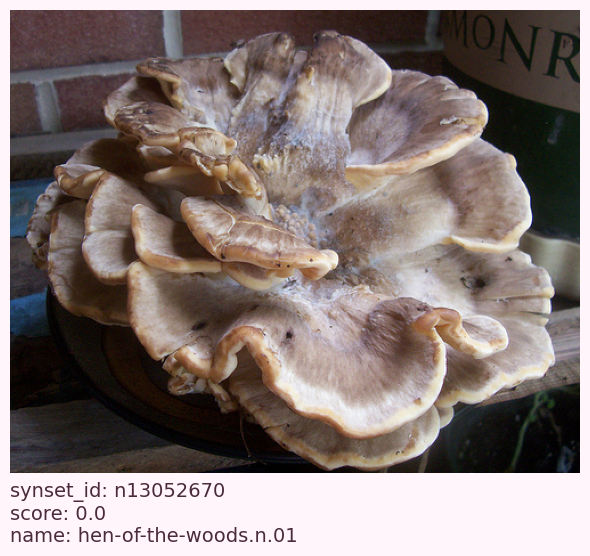

In [36]:
df1 = pd.read_csv("synsetid_words.csv") #1k synset ids needed for imageset
score_dict = dict(synset_scores)

df1["score"] = df1["synset_id"].map(score_dict) # use score dictionary from before to initialize scores
df1["synset_name"] = df1["synset_id"].apply(synset_name) # has .n.
assign_new_synsetid(df1, 4.9,4.9)

show_image_with_metadata(img_df, "n13052670", "val")

### Looking at the images of mapped names

We want to join these two dataframes

In [37]:
pd.set_option("display.max_colwidth", 300)

df1 = pd.read_csv("synsetid_words.csv") #1k synset ids needed for imageset
score_dict = dict(synset_scores)

df1["score"] = df1["synset_id"].map(score_dict) # use score dictionary from before to initialize scores
df1["synset_name"] = df1["synset_id"].apply(synset_name) # has .n.

thresh = 4.8
assign_new_synsetid(df1, thresh,thresh) # for no fallback use same threhold twice

df1
df1.to_pickle("df1.pkl")

In [38]:
img_df

ImageId  \
0      ILSVRC2012_val_00048981   
1      ILSVRC2012_val_00037956   
2      ILSVRC2012_val_00026161   
3      ILSVRC2012_val_00026171   
4      ILSVRC2012_val_00008726   
...                        ...   
49995  ILSVRC2012_val_00005961   
49996  ILSVRC2012_val_00008801   
49997  ILSVRC2012_val_00008176   
49998  ILSVRC2012_val_00004764   
49999  ILSVRC2012_val_00031847   

                                                                                                                                                                                                                                                                             PredictionString  \
0                                                                                                                                                                                                                                                                     n03995372 85 1 499 272    
1                                                                                                                                                                                                                                                                    n03481172 131 0 499 254    
2                                                                                                                                                                                                                                                                     n02108000 38 0 464 280    
3                                                                                                                                                                                                                                                                     n03109150 0 14 216 299    
4                                                                                                                                                                                                                                          n02119789 255 142 454 329 n02119789 44 21 322 295    
...                                                                                                                                                                                                                                                                                       ...   
49995                                                                                                                                                                                                                                                                n03388043 103 0 279 472    
49996  n03089624 101 286 170 374 n03089624 236 282 306 374 n03089624 1 236 498 373 n03089624 370 286 439 369 n03089624 1 249 105 373 n03089624 0 0 499 374 n03089624 170 287 235 373 n03089624 339 101 398 182 n03089624 436 281 498 373 n03089624 306 281 370 374 n03089624 168 242 234 286    
49997                                                                                                                                                                                                                                                                n01518878 82 98 439 498    
49998                                                                                                                                                                                                                                                               n03874293 91 111 490 420    
49999                                                                                                                                                                                                                                                                n01855032 48 92 415 227    

       synset_id  score                  synset_name  
0      n03995372   0.00             power_drill.n.01  
1      n03481172   4.77            

In [39]:
new_img_df = img_df.merge(
    df1[
        ["synset_id", "mapped_synset_id", "mapped_score","mapped_synset_list"]
    ],
    on="synset_id",
    how="left"
)

#new_img_df["mapped_synset_name"] = new_img_df["mapped_synset_id"].apply(synset_name)

new_img_df

ImageId  \
0      ILSVRC2012_val_00048981   
1      ILSVRC2012_val_00037956   
2      ILSVRC2012_val_00026161   
3      ILSVRC2012_val_00026171   
4      ILSVRC2012_val_00008726   
...                        ...   
49995  ILSVRC2012_val_00005961   
49996  ILSVRC2012_val_00008801   
49997  ILSVRC2012_val_00008176   
49998  ILSVRC2012_val_00004764   
49999  ILSVRC2012_val_00031847   

                                                                                                                                                                                                                                                                             PredictionString  \
0                                                                                                                                                                                                                                                                     n03995372 85 1 499 272    
1                                                                                                                                                                                                                                                                    n03481172 131 0 499 254    
2                                                                                                                                                                                                                                                                     n02108000 38 0 464 280    
3                                                                                                                                                                                                                                                                     n03109150 0 14 216 299    
4                                                                                                                                                                                                                                          n02119789 255 142 454 329 n02119789 44 21 322 295    
...                                                                                                                                                                                                                                                                                       ...   
49995                                                                                                                                                                                                                                                                n03388043 103 0 279 472    
49996  n03089624 101 286 170 374 n03089624 236 282 306 374 n03089624 1 236 498 373 n03089624 370 286 439 369 n03089624 1 249 105 373 n03089624 0 0 499 374 n03089624 170 287 235 373 n03089624 339 101 398 182 n03089624 436 281 498 373 n03089624 306 281 370 374 n03089624 168 242 234 286    
49997                                                                                                                                                                                                                                                                n01518878 82 98 439 498    
49998                                                                                                                                                                                                                                                               n03874293 91 111 490 420    
49999                                                                                                                                                                                                                                                                n01855032 48 92 415 227    

       synset_id  score                  synset_name mapped_synset_id  \
0      n03995372   0.00             power_drill.n.01             None   

In [40]:
# count NaN in mapped_synset_id
n_nan = new_img_df["mapped_synset_id"].isna().sum()

# split dataframe
nan_new_img_df = new_img_df[new_img_df["mapped_synset_id"].isna()]
new_img_df = new_img_df[new_img_df["mapped_synset_id"].notna()]

print("Lost images", n_nan,)
new_img_df


Lost images 10800


ImageId  \
2      ILSVRC2012_val_00026161   
3      ILSVRC2012_val_00026171   
4      ILSVRC2012_val_00008726   
5      ILSVRC2012_val_00023881   
6      ILSVRC2012_val_00011205   
...                        ...   
49993  ILSVRC2012_val_00042994   
49994  ILSVRC2012_val_00039369   
49997  ILSVRC2012_val_00008176   
49998  ILSVRC2012_val_00004764   
49999  ILSVRC2012_val_00031847   

                                         PredictionString  synset_id  score  \
2                                 n02108000 38 0 464 280   n02108000   0.00   
3                                 n03109150 0 14 216 299   n03109150   4.85   
4      n02119789 255 142 454 329 n02119789 44 21 322 295   n02119789   0.00   
5                                  n02666196 0 6 373 498   n02666196   4.52   
6                               n02106166 134 90 332 332   n02106166   0.00   
...                                                   ...        ...    ...   
49993                           n02823750 80 131 308 252   n02823750   0.00   
49994                           n02071294 161 75 334 241   n02071294   0.00   
49997                            n01518878 82 98 439 498   n01518878   4.71   
49998                           n03874293 91 111 490 420   n03874293   0.00   
49999                            n01855032 48 92 415 227   n01855032   0.00   

                       synset_name mapped_synset_id  mapped_score  \
2                 entlebucher.n.01        n02084071          4.85   
3                   corkscrew.n.01        n03109150          4.85   
4                     kit_fox.n.01        n02118333          4.97   
5                      abacus.n.02        n02938886          4.86   
6               border_collie.n.01        n02084071          4.85   
...                            ...              ...           ...   
49993              beer_glass.n.01        n03438257          4.82   
49994            killer_whale.n.01        n02068974          4.96   
49997                 ostrich.n.02        n01503061          5.00   
49998             paddlewheel.n.01        n04574999          4.86   
49999  red-breasted_merganser.n.01        n01846331          4.86   

                                                             mapped_synset_list  
2             entlebucher.n.01 → sennenhunde.n.01 → working_dog.n.01 → dog.n.01  
3                                                                     n03109150  
4                                                       kit_fox.n.01 → fox.n.01  
5                                                 abacus.n.02 → calculator.n.02  
6          border_collie.n.01 → shepherd_dog.n.01 → working_dog.n.01 → dog.n.01  
...                                                                         ...  
49993                                              beer_glass.n.01 → glass.n.02  
49994                                          killer_whale.n.01 → dolphin.n.02  
49997                                    ostrich.n.02 → ratite.n.01 → bird.n.01  
49998                                             paddlewheel.n.01 → wheel.n.01  
49999  red-breasted_merganser.n.01 → merganser.n.01 → sea_duck.n.01 → duck.n.01  

[39200 rows x 8 columns]

In [41]:
new_img_df["mapped_synset_name"] = new_img_df["mapped_synset_id"].apply(synset_name)

In [42]:
def show_image_id(
    df,
    ImageId,
    img_dir="val",
    figsize=(6, 7),
):
    row = df.loc[df["ImageId"] == ImageId].iloc[0]

    img_path = f"{img_dir}/{row['ImageId']}.JPEG"
    img = Image.open(img_path)

    fig, ax = plt.subplots(figsize=figsize)

    ax.imshow(img)
    ax.axis("off")

    # caption text (left-aligned, compact)
    caption = (
        f"synset_id: {row['synset_id']}\n"
        f"score: {row['score']}\n"
        f"name: {row['synset_name']}\n"
        f"mapped synset_id: {row['mapped_synset_id']}\n"
        f"mapped score: {row['mapped_score']}\n"
        f"mapped name: {row['mapped_synset_name']}\n"
        

    )

    ax.text(
        0.0, -0.02,              # push below image
        caption,
        transform=ax.transAxes,
        ha="left",
        va="top",
        fontsize=16,
        color="#4A2B3B",
        family="DejaVu Sans"
    )

    fig.patch.set_facecolor("#FFF5FA")
    ax.set_facecolor("#FDECF7")
    plt.title( f"{row['mapped_synset_list']}\n", fontsize= 14)
    plt.tight_layout()
    plt.show()

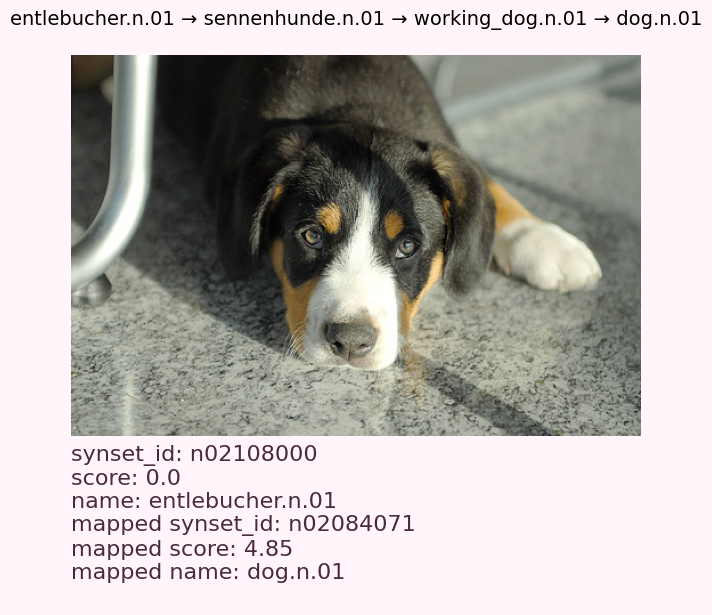

In [43]:
show_image_id(new_img_df, "ILSVRC2012_val_00026161", "val")

In [44]:
def show_triplet(
    df,
    image_ids,          # list/tuple of 3 ImageIds
    img_dir="val",
    figsize=(15, 6),
):
    assert len(image_ids) == 3

    fig, axes = plt.subplots(1, 3, figsize=figsize)

    for ax, img_id in zip(axes, image_ids):
        row = df.loc[df["ImageId"] == img_id].iloc[0]

        img_path = f"{img_dir}/{row['ImageId']}.JPEG"
        img = Image.open(img_path)

        ax.imshow(img)
        ax.axis("off")

        caption = (
            f"{row['synset_name']}\n"
            f"→ {row['mapped_synset_name']}\n"
            f"score {row['mapped_score']}"
        )

        ax.text(
            0.5, -0.08,
            caption,
            transform=ax.transAxes,
            ha="center",
            va="top",
            fontsize=14,
            family="DejaVu Sans"
        )
    fig.patch.set_facecolor("#FFF5FA")
    ax.set_facecolor("#FDECF7")

    plt.tight_layout()
    plt.show()

### Example Triplet

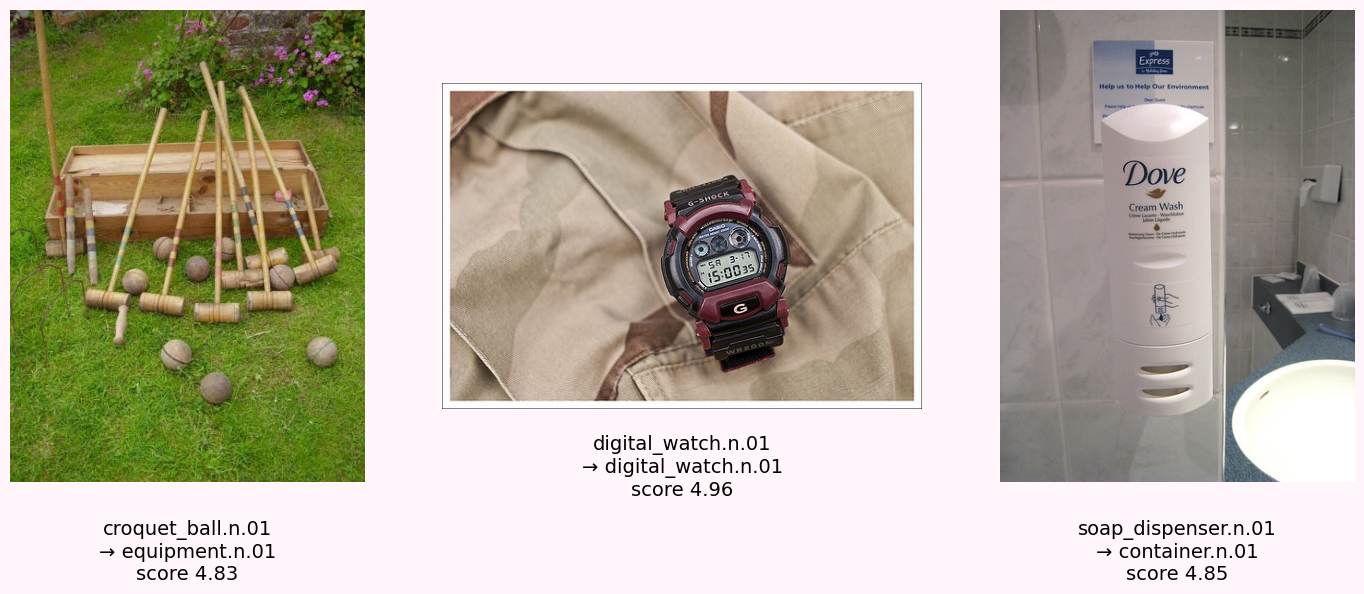

In [45]:
image_ids = new_img_df["ImageId"].sample(n=3, random_state=42).tolist()
show_triplet(new_img_df,image_ids,"val")

### Looking at lost images

In [46]:
nan_new_img_df

ImageId  \
0      ILSVRC2012_val_00048981   
1      ILSVRC2012_val_00037956   
7      ILSVRC2012_val_00048237   
13     ILSVRC2012_val_00033371   
21     ILSVRC2012_val_00023865   
...                        ...   
49980  ILSVRC2012_val_00027499   
49987  ILSVRC2012_val_00009878   
49990  ILSVRC2012_val_00012862   
49995  ILSVRC2012_val_00005961   
49996  ILSVRC2012_val_00008801   

                                                                                                                                                                                                                                                                             PredictionString  \
0                                                                                                                                                                                                                                                                     n03995372 85 1 499 272    
1                                                                                                                                                                                                                                                                    n03481172 131 0 499 254    
7                                                                                                                                                                                                                                        n06874185 103 115 154 218 n06874185 346 116 397 220    
13                                                                                                                                                                                                                                                                     n03530642 0 0 498 374    
21                                                                                                                                                                                                                                         n01950731 153 72 379 374 n01950731 348 92 429 214    
...                                                                                                                                                                                                                                                                                       ...   
49980                                                                                                                                                                                                                                                                n01945685 82 29 402 415    
49987                                                                                                                                                                                                                                                                   n02447366 2 6 127 76    
49990                                                                                                                                                                                                                                                                n04456115 90 12 350 498    
49995                                                                                                                                                                                                                                                                n03388043 103 0 279 472    
49996  n03089624 101 286 170 374 n03089624 236 282 306 374 n03089624 1 236 498 373 n03089624 370 286 439 369 n03089624 1 249 105 373 n03089624 0 0 499 374 n03089624 170 287 235 373 n03089624 339 101 398 182 n03089624 436 281 498 373 n03089624 306 281 370 374 n03089624 168 242 234 286    

       synset_id  score         synset_name mapped_synset_id  mapped_score  \
0      n03995372   0.00    power_drill.n.01             None       

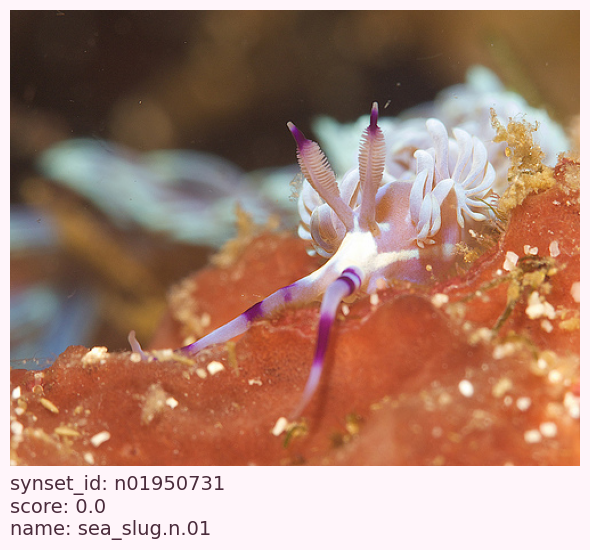

In [47]:
show_image_with_metadata(nan_new_img_df, "n01950731", "val")

### Extra visualize tree

In [48]:
from graphviz import Digraph

def visualize_hypernym_tree(
    synset_id,
    score_col=None,
    thresh_primary=None,
    max_nodes=300
):
    pos = 'n'
    offset = int(synset_id[1:])

    try:
        root = wn.synset_from_pos_and_offset(pos, offset)
    except:
        raise ValueError("Invalid synset id")

    dot = Digraph(format="png")
    dot.attr(rankdir="TB", fontsize="10")

    visited = set()
    node_count = 0

    def dfs(node):
        nonlocal node_count
        if node_count >= max_nodes:
            return

        node_id = f"{pos}{node.offset():08d}"
        if node_id in visited:
            return

        visited.add(node_id)
        node_count += 1

        label = node.name()
        if score_col is not None:
            score = score_col.get(node_id)
            label += f"\nscore={score:.2f}" if score is not None else "\nscore=None"

        fillcolor = "white"
        if thresh_primary is not None and score_col is not None:
            score = score_col.get(node_id)
            if score is not None and score >= thresh_primary:
                fillcolor = "lightgreen"

        dot.node(
            node_id,
            label=label,
            style="filled",
            fillcolor=fillcolor
        )

        for parent in node.hypernyms():
            parent_id = f"{pos}{parent.offset():08d}"
            dot.edge(node_id, parent_id)
            dfs(parent)

    dfs(root)
    return dot


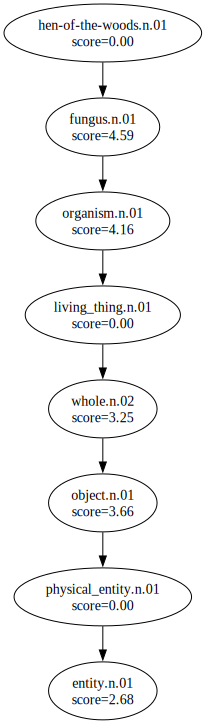

In [49]:
# This shows the route when searching a new label.

visualize_hypernym_tree(
    synset_id="n13052670",   
    score_col=synset_scores,
    thresh_primary=4.7,
    max_nodes=200
)


### Warning can get huge

In [50]:
def visualize_hyponym_tree_with_scores(
    root_synset_name="entity.n.01",
    score_col=None,           
    thresh=None,              
    max_depth=4,
    max_nodes=300,
    show_only_threshold=False
):
    try:
        root = wn.synset(root_synset_name)
    except:
        raise ValueError("Invalid synset name")

    # Convert Series to dict if needed
    if score_col is not None and hasattr(score_col, "to_dict"):
        score_col = score_col.to_dict()

    dot = Digraph(format="png")
    dot.attr(rankdir="TB", fontsize="10")

    visited = set()
    node_count = 0

    def dfs(node, depth):
        nonlocal node_count
        if depth > max_depth or node_count >= max_nodes:
            return

        node_id = f"n{node.offset():08d}"
        if node_id in visited:
            return

        visited.add(node_id)

        # Get score
        score = score_col.get(node_id) if score_col else None

        # Build label
        label = f"{node.name()}"
        if score is not None:
            label += f"\nscore={score:.2f}"

        # Determine color
        fillcolor = "white"
        if thresh is not None and score is not None and score >= thresh:
            fillcolor = "lightgreen"

        # Skip node if show_only_threshold is True and node does not meet threshold
        if show_only_threshold and (score is None or score < thresh):
            pass
        else:
            dot.node(node_id, label=label, style="filled", fillcolor=fillcolor)
            node_count += 1

        # Traverse children
        for child in node.hyponyms():
            child_id = f"n{child.offset():08d}"
            child_score = score_col.get(child_id) if score_col else None
            if show_only_threshold and (child_score is None or child_score < thresh):
                continue
            dot.edge(node_id, child_id)
            dfs(child, depth + 1)

    dfs(root, depth=0)
    return dot


In [51]:
# Convert df1["mapped_score"] (Series) automatically
dot = visualize_hyponym_tree_with_scores(
    root_synset_name="mammal.n.01",
    score_col=df1.set_index("synset_id")["mapped_score"],  # Series
    thresh=4.7,
    max_depth=100,
    max_nodes=2000,
    show_only_threshold=False
)
dot



In [52]:
from graphviz import Digraph

def vertical_label(text):
    # TODO fix rotation
    return "<" + "<BR/>".join(list(text)) + ">"

def visualize_hyponym_tree(
    root_synset_name="entity.n.01",
    score_col=None,           
    thresh=None,              
    max_depth=4,
    max_nodes=300,
    show_only_threshold=False,
    page_size_mm=(600, 200)   # width x height in mm
):
    try:
        root = wn.synset(root_synset_name)
    except:
        raise ValueError("Invalid synset name")

    # Convert Series to dict if needed
    if score_col is not None and hasattr(score_col, "to_dict"):
        score_col = score_col.to_dict()

    dot = Digraph(format="pdf") 
    dot.attr(rankdir="TB", fontsize="10")
    
    # Set Graphviz layout hints
    width_in = page_size_mm[0] / 25.4  # mm -> inches
    height_in = page_size_mm[1] / 25.4
    dot.attr(size=f"{width_in},{height_in}!")  
    dot.attr(ratio='fill')                   
    dot.attr(margin='0.2')                  

    visited = set()
    node_count = 0

    def dfs(node, depth):
        nonlocal node_count
        if depth > max_depth or node_count >= max_nodes:
            return

        node_id = f"n{node.offset():08d}"
        if node_id in visited:
            return
        visited.add(node_id)

        score = score_col.get(node_id) if score_col else None
        label = f"{node.name()}"
        if score is not None:
            label += f"\nscore={score:.2f}"

        fillcolor = "white"
        if thresh is not None and score is not None and score >= thresh: 
            fillcolor = "lightgreen"
        if show_only_threshold and (score is None or score < thresh):
            pass
        else:
            dot.node(
                node_id,
                label=vertical_label(label),
                style="filled",
                fillcolor=fillcolor,
                shape="box",
                fontsize="30",
                width="2",    # inches
                height="1",   # inches
                fixedsize="false"  # or "true" to force exact size
            )
            node_count += 1

        for child in node.hyponyms():
            child_id = f"n{child.offset():08d}"
            child_score = score_col.get(child_id) if score_col else None
            if show_only_threshold and (child_score is None or child_score < thresh):
                continue
            dot.edge(node_id, child_id)
            dfs(child, depth + 1)

    dfs(root, depth=0)
    return dot


In [53]:
dot = visualize_hyponym_tree(
    root_synset_name="bird.n.01",
    score_col=df1.set_index("synset_id")["mapped_score"],
    thresh=4.7,
    max_depth=3,
    max_nodes=30000,
    show_only_threshold=False
)

dot.render("figures/bird_tree") 

'figures/bird_tree.pdf'

In [54]:
# write score=0 if Nan

def vertical_label(text):
   
    return "<" + "<BR/>".join(list(text)) + ">"

def visualize_hyponym_tree(
    root_synset_name="entity.n.01",
    score_col=None,           
    thresh=None,              
    max_depth=4,
    max_nodes=300,
    show_only_threshold=False,
    page_size_mm=(600, 200)   # width x height in mm
):
    try:
        root = wn.synset(root_synset_name)
    except:
        raise ValueError("Invalid synset name")

    # Convert Series to dict if needed
    if score_col is not None and hasattr(score_col, "to_dict"):
        score_col = score_col.to_dict()

    dot = Digraph(format="pdf") 
    dot.attr(rankdir="TB", fontsize="10")
    
    # Set Graphviz layout hints
    width_in = page_size_mm[0] / 25.4  # mm -> inches
    height_in = page_size_mm[1] / 25.4
    dot.attr(size=f"{width_in},{height_in}!")  
    dot.attr(ratio='fill')                   
    dot.attr(margin='0.2')                  

    visited = set()
    node_count = 0



    def dfs(node, depth):
        nonlocal node_count
        if depth > max_depth or node_count >= max_nodes:
            return

        node_id = f"n{node.offset():08d}"
        if node_id in visited:
            return
        visited.add(node_id)

        # Get score if available
        score = score_col.get(node_id) if score_col else None

        # Treat None, NaN, or 0 as 0
        if score is None or (isinstance(score, float) and math.isnan(score)) or score == 0:
            display_score = 0
        else:
            display_score = score

        # Build label with score
        label = f"{node.name()}\nscore={display_score:.2f}"

        # Decide fill color only based on threshold (optional highlighting)
        fillcolor = "white"
        if thresh is not None and score is not None and not math.isnan(score) and score >= thresh:
            fillcolor = "lightgreen"

        # Always create node
        dot.node(
            node_id,
            label=vertical_label(label),
            style="filled",
            fillcolor=fillcolor,
            shape="box",
            fontsize="30",
            width="2",
            height="1",
            fixedsize="false"
        )
        node_count += 1

        # Recurse for children
        for child in node.hyponyms():
            child_id = f"n{child.offset():08d}"
            dot.edge(node_id, child_id)
            dfs(child, depth + 1)



    dfs(root, depth=0)
    return dot


### Create Substructure of Wordnet Structure

In [55]:
class FilteredSynset:
    def __init__(self, synset, score_dict=None, thresh=None):
        self.synset = synset
        self.score_dict = score_dict or {}
        self.thresh = thresh

    def name(self):
        return self.synset.name()

    def pos(self):
        return self.synset.pos()

    def definition(self):
        return self.synset.definition()

    def examples(self):
        return self.synset.examples()

    def offset(self):
        return self.synset.offset()

    def lemmas(self):
        return self.synset.lemmas()

    def hyponyms(self):
        result = []

        for child in self.synset.hyponyms():

            child_score = self.score_dict.get(f"n{child.offset():08d}", 0)

            filtered_child = FilteredSynset(child, self.score_dict, self.thresh)
            descendants = filtered_child.hyponyms()

            if (child_score >= self.thresh) or descendants:
                result.append(filtered_child)

        return result


In [56]:
def visualize_sub_hyponym_tree(
    root_synset_name=None,  # can now accept FilteredSynset object
    score_col=None,           
    thresh=None,              
    max_depth=4,
    max_nodes=300,
    show_only_threshold=False,
    page_size_mm=(600, 200)   # width x height in mm
):
    # Determine root
    if isinstance(root_synset_name, FilteredSynset) or isinstance(root_synset_name, wn.synset.__class__):
        root = root_synset_name
    elif isinstance(root_synset_name, str):
        try:
            root = wn.synset(root_synset_name)
        except:
            raise ValueError("Invalid synset name")
    else:
        raise ValueError("root_synset_name must be a string or Synset/FilteredSynset object")

    # Convert Series to dict if needed
    if score_col is not None and hasattr(score_col, "to_dict"):
        score_col = score_col.to_dict()

    from graphviz import Digraph
    dot = Digraph(format="pdf") 
    dot.attr(rankdir="TB", fontsize="10")
    
    width_in = page_size_mm[0] / 25.4  # mm -> inches
    height_in = page_size_mm[1] / 25.4
    dot.attr(size=f"{width_in},{height_in}!")  
    dot.attr(ratio='fill')                   
    dot.attr(margin='0.2')                  

    visited = set()
    node_count = 0

    def vertical_label(text):
        return "<" + "<BR/>".join(list(text)) + ">"

    def dfs(node, depth):
        nonlocal node_count
        if depth > max_depth or node_count >= max_nodes:
            return

        node_id = f"n{node.offset():08d}"
        if node_id in visited:
            return
        visited.add(node_id)

        score = score_col.get(node_id) if score_col else None
        label = f"{node.name()}"
        if score is not None:
            label += f"\nscore={score:.2f}"

        fillcolor = "white"
        if thresh is not None and score is not None and score >= thresh: 
            fillcolor = "lightgreen"
        if show_only_threshold and (score is None or score < thresh):
            pass
        else:
            dot.node(
                node_id,
                label=vertical_label(label),
                style="filled",
                fillcolor=fillcolor,
                shape="box",
                fontsize="30",
                width="2",
                height="1",
                fixedsize="false"
            )
            node_count += 1

        for child in node.hyponyms():
            child_id = f"n{child.offset():08d}"
            child_score = score_col.get(child_id) if score_col else None
            if show_only_threshold and (child_score is None or child_score < thresh):
                continue
            dot.edge(node_id, child_id)
            dfs(child, depth + 1)

    dfs(root, depth=0)
    return dot


In [57]:
class FilteredSynset:
    def __init__(self, synset, score_dict=None, thresh=None):
        self.synset = synset
        self.score_dict = score_dict or {}
        self.thresh = thresh

    def name(self):
        return self.synset.name()

    def pos(self):
        return self.synset.pos()

    def definition(self):
        return self.synset.definition()

    def examples(self):
        return self.synset.examples()

    def offset(self):
        return self.synset.offset()

    def lemmas(self):
        return self.synset.lemmas()

    def hyponyms(self):
        result = []

        for child in self.synset.hyponyms():

            child_score = self.score_dict.get(f"n{child.offset():08d}", 0)

            filtered_child = FilteredSynset(child, self.score_dict, self.thresh)
            descendants = filtered_child.hyponyms()

            if (child_score >= self.thresh) or descendants:
                result.append(filtered_child)

        return result

from graphviz import Digraph

def visualize_sub_hyponym_tree(
    root_synset_name=None,  # can now accept FilteredSynset object
    score_col=None,           
    thresh=None,              
    max_depth=4,
    max_nodes=300,
    show_only_threshold=False,
    page_size_mm=(3000, 3000)   # width x height in mm
):
    # Determine root
    if isinstance(root_synset_name, FilteredSynset) or isinstance(root_synset_name, wn.synset.__class__):
        root = root_synset_name
    elif isinstance(root_synset_name, str):
        try:
            root = wn.synset(root_synset_name)
        except:
            raise ValueError("Invalid synset name")
    else:
        raise ValueError("root_synset_name must be a string or Synset/FilteredSynset object")

    # Convert Series to dict if needed
    if score_col is not None and hasattr(score_col, "to_dict"):
        score_col = score_col.to_dict()

    
    dot = Digraph(format="pdf") 
    #dot.engine = 'neato'  # or 'fdp'

    dot.attr(rankdir="LR", fontsize="40")
    
    width_in = page_size_mm[0] / 25.4  # mm -> inches
    height_in = page_size_mm[1] / 25.4
    dot.attr(size=f"{width_in},{height_in}")  
    dot.attr(ratio='fill')                   
    dot.attr(margin='0') 
    dot.attr(ranksep="0")   
    dot.attr(nodesep="0")

    visited = set()
    node_count = 0

    def dfs(node, depth):
        nonlocal node_count
        if depth > max_depth or node_count >= max_nodes:
            return

        node_id = f"n{node.offset():08d}"
        if node_id in visited:
            return
        visited.add(node_id)

        score = score_col.get(node_id) if score_col else None
        label = f"{node.name()}"
        if score is not None:
            label += f"\nscore={score:.2f}"

        fillcolor = "white"
        if thresh is not None and score is not None and score >= thresh: 
            fillcolor = "lightgreen"
        if show_only_threshold and (score is None or score < thresh):
            pass
        else:
            dot.node(
                node_id,
                label=label,
                style="filled",
                fillcolor=fillcolor,
                shape="box",
                fontsize="40",
                width="2",
                height="1",
                fixedsize="false"
            )
            node_count += 1

        for child in node.hyponyms():

            if not isinstance(child, FilteredSynset):
                child = FilteredSynset(child, score_col, thresh)

            child_id = f"n{child.offset():08d}"
            child_score = score_col.get(child_id) if score_col else None
            if show_only_threshold and (child_score is None or child_score < thresh):
                continue
            dot.edge(node_id, child_id)
            dfs(child, depth + 1)

    dfs(root, depth=0)
    return dot

df1 = pd.read_pickle("df1.pkl")
root_synset = wn.synset("entity.n.01")
score_dict_mapped = df1.set_index("synset_id")["mapped_score"].to_dict()
filtered_root = FilteredSynset(root_synset, score_dict=score_dict_mapped, thresh=4.9)


dot = visualize_sub_hyponym_tree(
    root_synset_name=filtered_root,
    score_col=score_dict_mapped,
    thresh=4.7,
    max_depth=5000,
    max_nodes=30000
)

dot.render("filtered_tree")


'filtered_tree.pdf'

In [58]:
from graphviz import Digraph
import math

def visualize_sub_hyponym_tree(
    root_synset_name=None,
    score_col=None,
    thresh=None,
    max_depth=6,
    max_nodes=300,
    show_only_threshold=False,
    page_size_mm=(3000, 3000)
):
    # Resolve root
    if isinstance(root_synset_name, (FilteredSynset, wn.synset.__class__)):
        root = root_synset_name
    elif isinstance(root_synset_name, str):
        root = wn.synset(root_synset_name)
    else:
        raise ValueError("Invalid root")

    if score_col is not None and hasattr(score_col, "to_dict"):
        score_col = score_col.to_dict()

    dot = Digraph(format="pdf", engine="sfdp")

    width_in = page_size_mm[0] / 25.4
    height_in = page_size_mm[1] / 25.4

    dot.attr(
        size=f"{width_in},{height_in}",
        ratio="fill",
        overlap="false",
        splines="true",
        margin="0.05",
        bgcolor="white"
    )

    dot.attr(
        "node",
        shape="box",
        style="rounded,filled",
        fillcolor="#f7f7f7",
        color="#444444",
        fontname="Helvetica",
        penwidth="1.2"
    )

    dot.attr(
        "edge",
        color="#999999",
        penwidth="0.8"
    )

    visited = set()
    node_count = 0

    def adaptive_font(depth):
        # Bigger text near root, smaller as density increases
        return str(max(12, int(42 - depth * 4 - node_count / 40)))

    def dfs(node, depth):
        nonlocal node_count
        if depth > max_depth or node_count >= max_nodes:
            return

        node_id = f"n{node.offset():08d}"
        if node_id in visited:
            return
        visited.add(node_id)

        score = score_col.get(node_id) if score_col else None
        label = node.name().replace("_", " ")

        if score is not None:
            label += f"\n{score:.2f}"

        fillcolor = "#f7f7f7"
        if thresh is not None and score is not None and score >= thresh:
            fillcolor = "#c7f2c2"

        if not (show_only_threshold and (score is None or score < thresh)):
            dot.node(
                node_id,
                label=label,
                fillcolor=fillcolor,
                fontsize=adaptive_font(depth)
            )
            node_count += 1

        for child in node.hyponyms():
            if node_count >= max_nodes:
                break

            if not isinstance(child, FilteredSynset):
                child = FilteredSynset(child, score_col, thresh)

            child_id = f"n{child.offset():08d}"
            child_score = score_col.get(child_id) if score_col else None

            if show_only_threshold and (child_score is None or child_score < thresh):
                continue

            dot.edge(node_id, child_id)
            dfs(child, depth + 1)

    dfs(root, 0)
    return dot


In [59]:
df1 = pd.read_pickle("df1.pkl")
root_synset = wn.synset("entity.n.01")
score_dict_mapped = df1.set_index("synset_id")["mapped_score"].to_dict()
filtered_root = FilteredSynset(root_synset, score_dict=score_dict_mapped, thresh=4.9)


dot = visualize_sub_hyponym_tree(
    root_synset_name=filtered_root,
    score_col=score_dict_mapped,
    thresh=4.7,
    max_depth=5000,
    max_nodes=30000
)

dot.render("filtered_tree")


'filtered_tree.pdf'

In [60]:
import networkx as nx
from pyvis.network import Network

def visualize_hyponym_tree_interactive(root_synset_name, score_col=None, thresh=None, max_depth=6, max_nodes=300, show_only_threshold=False):
    if isinstance(root_synset_name, (FilteredSynset, wn.synset.__class__)):
        root = root_synset_name
    elif isinstance(root_synset_name, str):
        root = wn.synset(root_synset_name)
    else:
        raise ValueError("Invalid root")

    if score_col is not None and hasattr(score_col, "to_dict"):
        score_col = score_col.to_dict()

    G = nx.DiGraph()
    visited = set()
    node_count = 0

    def dfs(node, depth):
        nonlocal node_count
        if depth > max_depth or node_count >= max_nodes:
            return

        node_id = f"n{node.offset():08d}"
        if node_id in visited:
            return
        visited.add(node_id)
        
        score = score_col.get(node_id) if score_col else 0.5
        label = node.name().replace("_", " ")
        if score is not None:
            label += f"\n{score:.2f}"


        if show_only_threshold and score_col and (score is None or score < thresh):
            pass
        else:
            # Size proportional to score, root largest
            size = 50 if depth == 0 else max(10, 50 * score)
            color = "#FF9999" if depth == 0 else ("#c7f2c2" if thresh and score >= thresh else "#f7f7f7")

            G.add_node(node_id, label=label, size=size, color=color)
            node_count += 1

        for child in node.hyponyms():
            if node_count >= max_nodes:
                break
            if not isinstance(child, FilteredSynset):
                child = FilteredSynset(child, score_col, thresh)
            child_id = f"n{child.offset():08d}"
            child_score = score_col.get(child_id) if score_col else 0.5
            if show_only_threshold and score_col and (child_score is None or child_score < thresh):
                continue
            G.add_edge(node_id, child_id)
            dfs(child, depth + 1)

    dfs(root, 0)

    net = Network(height="3000px", width="3000px", directed=True)
    net.from_nx(G)
    net.show_buttons(filter_=['physics'])
    net.show("hyponym_tree.html")

visualize_hyponym_tree_interactive(
    filtered_root,
    score_col=score_dict_mapped,
    thresh=4.9,
    max_depth=6,       # keep small for testing
    max_nodes=300,     # browser-safe
    show_only_threshold=False
)



TypeError: unsupported operand type(s) for *: 'int' and 'NoneType'

In [61]:
import networkx as nx
from pyvis.network import Network
import os

def visualize_hyponym_tree_interactive(root_synset_name, score_col=None, thresh=None, max_depth=6, max_nodes=300, show_only_threshold=False, output_file="figures/hyponym_tree.html"):
    os.makedirs(os.path.dirname(output_file), exist_ok=True)

    if isinstance(root_synset_name, (FilteredSynset, wn.synset.__class__)):
        root = root_synset_name
    elif isinstance(root_synset_name, str):
        root = wn.synset(root_synset_name)
    else:
        raise ValueError("Invalid root")

    if score_col is not None and hasattr(score_col, "to_dict"):
        score_col = score_col.to_dict()

    G = nx.DiGraph()
    visited = set()
    node_count = 0

    def dfs(node, depth):
        nonlocal node_count
        if depth > max_depth or node_count >= max_nodes:
            return

        node_id = f"n{node.offset():08d}"
        if node_id in visited:
            return
        visited.add(node_id)

        # Missing scores treated as 0
        score = score_col.get(node_id) if score_col else 0
        if score is None:
            score = 0

        label = node.name().replace("_", " ")
        label += f"\n{score:.2f}"  # always show score

        if show_only_threshold and score < (thresh if thresh else 0):
            pass
        else:
            size = 60 if depth == 0 else max(10, 40 * score)
            color = "#FF9999" if depth == 0 else ("#c7f2c2" if thresh and score >= thresh else "#f7f7f7")
            G.add_node(node_id, label=label, size=size, color=color)
            node_count += 1

        for child in node.hyponyms():
            if node_count >= max_nodes:
                break
            if not isinstance(child, FilteredSynset):
                child = FilteredSynset(child, score_col, thresh)
            child_id = f"n{child.offset():08d}"
            child_score = score_col.get(child_id) if score_col else 0
            if child_score is None:
                child_score = 0
            if show_only_threshold and child_score < (thresh if thresh else 0):
                continue
            G.add_edge(node_id, child_id)
            dfs(child, depth + 1)

    dfs(root, 0)

    net = Network(height="1500px", width="1500px", directed=True)
    net.from_nx(G)
    net.show_buttons(filter_=['physics'])
    net.write_html(output_file)  # saves HTML without opening

visualize_hyponym_tree_interactive(
    filtered_root,
    score_col=score_dict_mapped,
    thresh=4.9,
    max_depth=6,       # keep small for testing
    max_nodes=300,     # browser-safe
    show_only_threshold=False
)

In [65]:
import networkx as nx
from pyvis.network import Network
import os

def visualize_hyponym_tree_interactive_stylish(
    root_synset_name, 
    score_col=None, 
    thresh=None, 
    max_depth=6, 
    max_nodes=300, 
    show_only_threshold=False, 
    output_file="figures/hyponym_tree_stylish.html"
):
    os.makedirs(os.path.dirname(output_file), exist_ok=True)

    if isinstance(root_synset_name, (FilteredSynset, wn.synset.__class__)):
        root = root_synset_name
    elif isinstance(root_synset_name, str):
        root = wn.synset(root_synset_name)
    else:
        raise ValueError("Invalid root")

    if score_col is not None and hasattr(score_col, "to_dict"):
        score_col = score_col.to_dict()
    
 

    G = nx.DiGraph()


    net = Network(height="1500px", width="2000px", directed=True, bgcolor="#1E1E2F", font_color="#FFFFFF")
    net.from_nx(G)

    # Barnes-Hut physics: adjust for easy dragging and spacing
    net.barnes_hut(
        gravity=-200000,          # repulsion from center (negative = pushes nodes out)
        central_gravity=0.3,     # pulls nodes slightly toward center
        spring_length=200,       # desired length of edges
        spring_strength=0.05,    # stiffness of edges
        damping=0.09,            # slows oscillations
        overlap=0                # prevents nodes from overlapping
    )

    const_options = {
        "physics": {
            "barnesHut": {
            "theta": 0.9,
            "gravitationalConstant": -20250,
            "centralGravity": 0.25,
            "springLength": 200,
            "damping": 0.14
            },
            "maxVelocity": 191,
            "minVelocity": 0.75
        }
    }
    visited = set()
    node_count = 0

    def dfs(node, depth):
        nonlocal node_count
        if depth > max_depth or node_count >= max_nodes:
            return

        node_id = f"n{node.offset():08d}"
        if node_id in visited:
            return
        visited.add(node_id)

        score = score_col.get(node_id) if score_col else 0
        if score is None:
            score = 0

        label = node.name().replace("_", " ")
        label += f"\n{score:.2f}"

    
        # Node size and font size scaled with score
        size = 10 if depth == 0 else max(15,  2**score)
        font_size = 40 
        # Colors: root = vibrant blue, high-score = cyan, others = purple/indigo gradient
        if depth == 0:
            color = "#FF002F"  # DodgerBlue root
        elif node.name() == "dog.n.01":
            color = "red"
        elif thresh and score >= 5.0:
            color = "#FFC800"  # DarkTurquoise for high-score
        elif thresh and score >= 4.9:
            color = "#94FF21"  # DarkTurquoise for high-score
        elif thresh and score >= 4.8:
            color = "#36CE2B"  # DarkTurquoise for high-score
        elif thresh and score >= 4.7:
            color = "#28AB26"  # DarkTurquoise for high-score
        elif thresh and score >= 4.6:
            color = "#1AA790"  # DarkTurquoise for high-score
        elif thresh and score >= 4.5:
            color = "#4037CB"  # DarkTurquoise for high-score
        elif thresh and score >= 4.0:
            color = "#4B1D87"  # DarkTurquoise for high-score
        elif thresh and score >= 3.0:
            color = "#4B1D87"  # DarkTurquoise for high-score
        elif thresh and score >= 2.0:
            color = "#4B1D87"  # DarkTurquoise for high-score
        elif thresh and score >= 1.0:
            color = "#4B1D87"  # DarkTurquoise for high-score
        else:
            color = "#8A2BE2"  # BlueViolet for others

        G.add_node(node_id, label=label, size=size, color=color, font={'size': 400, 'color': '#FFFFFF'})
        node_count += 1

        for child in node.hyponyms():
            if node_count >= max_nodes:
                break
            if not isinstance(child, FilteredSynset):
                child = FilteredSynset(child, score_col, thresh)
            child_id = f"n{child.offset():08d}"
            child_score = score_col.get(child_id) if score_col else 0
            if child_score is None:
                child_score = 0
            if show_only_threshold and child_score < (thresh if thresh else 0):
                continue
            G.add_edge(node_id, child_id)
            dfs(child, depth + 1)

    dfs(root, 0)

    # Dark mode network
    net = Network(
        height="1500px",
        width="1500px",
        directed=True,
        bgcolor="#1E1E2F",  # dark background
        font_color="#FFFFFF"
    )

  
    net.from_nx(G)
    net.show_buttons(filter_=['physics'])
    net.write_html(output_file)

visualize_hyponym_tree_interactive_stylish(
    filtered_root,
    score_col=score_dict_mapped,
    thresh=4.9,
    max_depth=12,       # keep small for testing
    max_nodes=3000,     # browser-safe
    show_only_threshold=False
)


In [ ]:
import networkx as nx
from pyvis.network import Network
import os

def visualize_hyponym_tree_interactive_stylish(
    root_synset_name, 
    score_col=None, 
    thresh=None, 
    max_depth=6, 
    max_nodes=300, 
    show_only_threshold=False, 
    output_file="figures/hyponym_tree_stylish.html"
):
    os.makedirs(os.path.dirname(output_file), exist_ok=True)

    if isinstance(root_synset_name, (FilteredSynset, wn.synset.__class__)):
        root = root_synset_name
    elif isinstance(root_synset_name, str):
        root = wn.synset(root_synset_name)
    else:
        raise ValueError("Invalid root")

    if score_col is not None and hasattr(score_col, "to_dict"):
        score_col = score_col.to_dict()
    
    G = nx.DiGraph()

    visited = set()
    node_count = 0

    def dfs(node, depth, tint_red=False):
        nonlocal node_count
        if depth > max_depth or node_count >= max_nodes:
            return

        node_id = f"n{node.offset():08d}"
        if node_id in visited:
            return
        visited.add(node_id)

        score = score_col.get(node_id) if score_col else 0
        if score is None:
            score = 0

        label = node.name().replace("_", " ")
        label += f"\n{score:.2f}"

        # Base color logic
        if depth == 0:
            color = "#FF002F"
        elif thresh and score >= 5.0:
            color = "#FFC800"
        elif thresh and score >= 4.9:
            color = "#94FF21"
        elif thresh and score >= 4.8:
            color = "#36CE2B"
        elif thresh and score >= 4.7:
            color = "#28AB26"
        elif thresh and score >= 4.6:
            color = "#1AA790"
        elif thresh and score >= 4.5:
            color = "#4037CB"
        elif thresh and score >= 4.0:
            color = "#4B1D87"
        elif thresh and score >= 3.0:
            color = "#4B1D87"
        elif thresh and score >= 2.0:
            color = "#4B1D87"
        elif thresh and score >= 1.0:
            color = "#4B1D87"
        else:
            color = "#8A2BE2"

        # Force dog.n.01 to be fully red and propagate tint to descendants
        if node.name() == "dog.n.01":
            color = "#FF0000"
            tint_red = True

        # Tint with red if flagged
        if tint_red and node.name() != "dog.n.01":
            def mix_red(c):
                r = int(255*0.5 + int(c[1:3],16)*0.5)
                g = int(0*0.5 + int(c[3:5],16)*0.5)
                b = int(0*0.5 + int(c[5:7],16)*0.5)
                return f"#{r:02X}{g:02X}{b:02X}"
            color = mix_red(color)

        # Node size and font
        size = 10 if depth == 0 else max(15, 2**score)
        G.add_node(node_id, label=label, size=size, color=color, font={'size': 400, 'color': '#FFFFFF'})
        node_count += 1

        for child in node.hyponyms():
            if node_count >= max_nodes:
                break
            if not isinstance(child, FilteredSynset):
                child = FilteredSynset(child, score_col, thresh)
            child_id = f"n{child.offset():08d}"
            child_score = score_col.get(child_id) if score_col else 0
            if child_score is None:
                child_score = 0
            if show_only_threshold and child_score < (thresh if thresh else 0):
                continue
            G.add_edge(node_id, child_id)
            dfs(child, depth + 1, tint_red=tint_red)

    dfs(root, 0)

    # Dark mode network
    net = Network(
        height="1500px",
        width="1500px",
        directed=True,
        bgcolor="#1E1E2F",
        font_color="#FFFFFF"
    )
    net.from_nx(G)
    net.barnes_hut(
        gravity=-200000,
        central_gravity=0.3,
        spring_length=200,
        spring_strength=0.05,
        damping=0.09,
        overlap=0
    )
    net.show_buttons(filter_=['physics'])
    net.write_html(output_file)

visualize_hyponym_tree_interactive_stylish(
    filtered_root,
    score_col=score_dict_mapped,
    thresh=4.9,
    max_depth=20,       # keep small for testing
    max_nodes=3000,     # browser-safe
    show_only_threshold=False
)